In [1]:
import time
start_time = time.time()

In [2]:
import locale
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    RocCurveDisplay
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
)

from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Import machine learning libraries (decision trees, regression, grid search, etc.)

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
plt.style.use("ggplot")
sns.set_context("notebook")

# Set locale into Spanish decimal format
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

cmap_univ = "Reds"

# Provide a default savefig dpi and resolution
rc_params = {
    "font.family": "Gotham",
    "figure.dpi": 300,
    "savefig.dpi": 600,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.125,
    "axes.unicode_minus": False,
    # Determine the font style of labels
    "axes.labelsize": 10,
    "axes.labelpad": 6.0,
    # The spines should be present and color should be black
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.edgecolor": "black",
    # Set the axes, ticks (not the tick labels)
    "axes.axisbelow": True,
    "xtick.bottom": True,
    "xtick.top": False,
    "ytick.left": True,
    "ytick.right": False,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.color": "black",
    "ytick.color": "black",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # The ticks should have a distance of 6
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    # Set a line width and color for the bars
    "lines.linewidth": 1,
    "lines.color": "black",
    # Set the grid
    # Remove the grid
    "axes.grid": False,
}

plt.rcParams.update(rc_params)

In [5]:
current_locale = locale.getlocale()
print(current_locale)

('en_US', 'UTF-8')


## Checking the Data

In [6]:
save_path = "../figures/02_train"
os.makedirs(save_path, exist_ok=True)

In [7]:
df_train = pd.read_csv("../data/02_leftright.csv")
df_predict = pd.read_csv("../data/03_other.csv")

In [8]:
df_train

Sex  Age  City  Education  Economic Status  Education Reform  \
0       0    1     0          4                0                 1   
1       0    1     0          4                1                 1   
2       0    0     0          2                1                 1   
3       0    1     0          3                0                 1   
4       0    4     0          5                0                 0   
...   ...  ...   ...        ...              ...               ...   
1066    0    0     0          2                0                 1   
1067    0    0     6          2                0                 1   
1068    0    1     5          2                0                 1   
1069    0    0     0          2                0                 1   
1070    0    1     2          2                1                 1   

      Privatization  Death Penalty  Neutral Journalism  Alcohol Prohibition  \
0                 1              0                   0                    0   
1                 0              1                   0                    1   
2                 0              1                   0                    1   
3                 1              1                   0                    0   
4                 0              0                   0                    0   
...             ...            ...                 ...                  ...   
1066              1              0                   0                    0   
1067              0              0                   0                    0   
1068              0              0                   0                    0   
1069              1              0                   0                    1   
1070              0              0                   0                    0   

      Secularism  Abortion Ban  Ohal  New Party  Political Affiliation  
0              1             0     1          1                      1  
1              0             1     0          0                      1  
2              1             1     1          1                      1  
3              1             1     0          0                      1  
4              0             0     0          0                      0  
...          ...           ...   ...        ...                    ...  
1066           1             0     0          0                      0  
1067           1             0     1          1                      0  
1068           1             0     1          1                      0  
1069           1             1     1          1                      1  
1070           1             0     1          1                      0  

[1071 rows x 15 columns]

In [9]:
print(df_train["Political Affiliation"].value_counts())

1    671
0    400
Name: Political Affiliation, dtype: int64


## Machine Learning

### Machine Learning Training with Original Data

In [10]:
# Machine learning models

X = df_train.drop(["Political Affiliation"], axis=1)
y = df_train[["Political Affiliation"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=1123
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

In [12]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "class_weight": ["balanced"],
    "random_state": [1123],
    "max_iter": [10, 100, 1000, 10000],
}

In [13]:
models = {
    "Decision Tree": DecisionTreeClassifier(
        random_state=1123,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight="balanced",
        criterion="entropy",
    ),
    "Random Forest": RandomForestClassifier(
        random_state=1123,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight="balanced",
        criterion="entropy",
        n_jobs=4
    ),
    "Logistic Regression": LogisticRegression(
        random_state=1123,
        class_weight="balanced",
        max_iter=1000,
        multi_class="multinomial",
        solver="lbfgs",
    ),
    "SVM": SVC(random_state=1123, class_weight="balanced", kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights="distance"),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=1123,
        n_estimators=1000,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
    ),
    "Grid Search": GridSearchCV(
        SVC(random_state=1123, class_weight="balanced", kernel='linear'),
        param_grid=param_grid,
        cv=5,
        n_jobs=4,
        refit=True,
    ),
    "Neural Networks": MLPClassifier(
        hidden_layer_sizes=(100, 100),
        max_iter=1000,
        random_state=1123
    ),
}

In [14]:
def train_test_accuess(models, X_train, y_train, X_test, y_test, train_acc, test_acc, filename, save_path):

    model_names = list(models.keys())

    fig, ax = plt.subplots(figsize=(18, 6))

    bar_width = 0.35
    index = np.arange(len(models))

    bar1 = ax.bar(
        index,
        train_acc,
        bar_width,
        label="Train Accuracy",
        linewidth=1,
        edgecolor="black",
    )
    bar2 = ax.bar(
        index + bar_width,
        test_acc,
        bar_width,
        label="Test Accuracy",
        linewidth=1,
        edgecolor="black",
    )

    ax.set_xlabel("Models")
    ax.set_ylabel("Accuracy")

    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(model_names)

    ax.legend(loc='best', bbox_to_anchor=(1.15, 1.0))

    ax.set_title("Train and Test Accuracies", fontweight="bold", fontsize=16, pad=10)

    ax.set_ylim(0, 1.1)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    for bar in bar1 + bar2:
        height = bar.get_height()
        formatted_height = locale.format_string("%.1f", height * 100, grouping=True)

        ax.annotate(
            f"{formatted_height}%",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=10,
        )

    plt.tight_layout()
    plt.savefig(os.path.join(save_path, filename), dpi=600, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [15]:
def confim(models, X_train, y_train, X_test, y_test, rows, columns, filename, save_path):
    model_names = list(models.keys())

    fig, axes = plt.subplots(rows, columns, figsize=(24, 12))

    labels = ["Liberal/Progressive", "Traditional/Conservative"]

    for i, (name, model) in enumerate(models.items()):
        row, col = divmod(i, columns)

        # Fit the model
        model.fit(X_train, y_train)  # Fit the model before predicting

        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap=cmap_univ,
            ax=axes[row, col],
            cbar=False,
            xticklabels=labels,
            yticklabels=labels,
            linewidths=0.5,
            linecolor="black",
        )  # Use a common colormap 'Blues'

        axes[row, col].set_title(name, fontweight="bold", fontsize=16, pad=10)
        axes[row, col].set_xlabel("Predicted")
        axes[row, col].set_ylabel("Actual")

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, filename), dpi=600, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [16]:
def roc_new(models, X_train, y_train, X_test, y_test, rows, columns, filename, save_path):
    model_names = list(models.keys())

    fig, axes = plt.subplots(rows, columns, figsize=(24, 12))

    for i, (name, model) in enumerate(models.items()):
        row, col = divmod(i, columns)

        # Select the correct subplot
        ax = axes[row, col] if rows > 1 and columns > 1 else axes[max(row, col)]

        disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax)

        # Set the title for each subplot
        ax.set_title(f"{name}", fontsize=16, fontweight="bold", pad=10)

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout(
        pad=3.0, w_pad=3.0, h_pad=3.0
    )  # Adjust subplots to fit into figure area.
    plt.savefig(os.path.join(save_path, filename), dpi=600, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [17]:
def ap(models, X_train, y_train, X_test, y_test, rows, columns, filename, save_path):

    model_names = list(models.keys())

    fig, axes = plt.subplots(rows, columns, figsize=(24, 12))

    for i, (name, model) in enumerate(models.items()):
        row, col = divmod(i, columns)

        # Fit the model
        model.fit(X_train, y_train)  # Fit the model before predicting

        # Predict probabilities for the positive class
        y_prob = model.predict(X_test)

        # Calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        ap_score = average_precision_score(y_test, y_prob)

        # Plot precision-recall curve
        axes[row, col].plot(
            recall,
            precision,
            color="maroon",
            label=locale.format_string("AP: %.2f", ap_score),
        )
        axes[row, col].set_title(name, fontweight="bold", fontsize=14, pad=10)
        axes[row, col].set_xlabel("Recall")
        axes[row, col].set_ylabel("Precision")
        axes[row, col].legend(loc="upper right")

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout(
        pad=3.0, w_pad=3.0, h_pad=3.0
    )
    plt.savefig(os.path.join(save_path, filename), dpi=600, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [18]:
def crossval(models, X_train, y_train, X_test, y_test, rows, columns, filename, save_path):

    model_names = list(models.keys())

    fig, axes = plt.subplots(rows, columns, figsize=(24, 12))

    for i, (name, model) in enumerate(models.items()):
        row, col = divmod(i, columns)

        # Fit the model
        model.fit(X_train, y_train)  # Fit the model before predicting

        # Plot the learning curve
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, n_jobs=-1
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot the learning curve
        axes[row, col].fill_between(
            train_sizes,
            train_scores_mean - train_scores_std,
            train_scores_mean + train_scores_std,
            alpha=0.1,
            color="maroon",
        )
        axes[row, col].fill_between(
            train_sizes,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha=0.1,
            color="indianred",
        )
        axes[row, col].plot(
            train_sizes, train_scores_mean, "o-", color="maroon", label="Training score"
        )
        axes[row, col].plot(
            train_sizes,
            test_scores_mean,
            "o-",
            color="indianred",
            label="Cross-validation score",
        )

        axes[row, col].set_title(name, fontweight="bold", fontsize=16, pad=10)
        axes[row, col].set_xlabel("Training examples")
        axes[row, col].set_ylabel("Score")
        axes[row, col].set_ylim(0.50, 1.05)
        axes[row, col].legend(loc="lower right")

        axes[row, col].yaxis.set_major_formatter(
            mtick.FuncFormatter(lambda y, _: locale.format_string("%.1f", y))
        )

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout(
        pad=3.0, w_pad=3.0, h_pad=3.0
    )
    plt.savefig(os.path.join(save_path, filename), dpi=600, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [19]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()

# Make the results into dataframe
result_list = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results_data = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

    result_list.append(pd.DataFrame([results_data]))

results = pd.concat(result_list, ignore_index=True)

accuracies_results_orig = []
# Make table for the accuracies in train and test
for name, model in models.items():
    # Train accuracy
    y_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_pred)
    # Test accuracy
    y_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    accuracies_results_orig.append(
        {
            "Model": name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
        }
    )

accuracies_results_orig = pd.DataFrame(accuracies_results_orig)

Decision Tree Accuracy: 0.6459627329192547
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.85      0.64       120
           1       0.85      0.52      0.65       202

    accuracy                           0.65       322
   macro avg       0.68      0.69      0.65       322
weighted avg       0.73      0.65      0.65       322

Decision Tree Confusion Matrix:
[[102  18]
 [ 96 106]]



Random Forest Accuracy: 0.7049689440993789
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       120
           1       0.87      0.62      0.72       202

    accuracy                           0.70       322
   macro avg       0.72      0.73      0.70       322
weighted avg       0.76      0.70      0.71       322

Random Forest Confusion Matrix:
[[102  18]
 [ 77 125]]

Logistic Regression Accuracy: 0.6863354037267081
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.76      0.64       120
           1       0.82      0.64      0.72       202

    accuracy                           0.69       322
   macro avg       0.69      0.70      0.68       322
weighted avg       0.72      0.69      0.69       322

Logistic Regression Confusion Matrix:
[[ 91  29]
 [ 72 130]]

SVM Accuracy: 0.6925465838509317
SVM Classification Repo

In [20]:
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.645963   0.854839  0.524752  0.650307
1        Random Forest  0.704969   0.874126  0.618812  0.724638
2  Logistic Regression  0.686335   0.817610  0.643564  0.720222
3                  SVM  0.692547   0.828025  0.643564  0.724234
4                  KNN  0.773292   0.811594  0.831683  0.821516
5    Gradient Boosting  0.773292   0.808612  0.836634  0.822384
6          Grid Search  0.770186   0.799065  0.846535  0.822115
7      Neural Networks  0.782609   0.808411  0.856436  0.831731


In [21]:
print(accuracies_results_orig)

                 Model  Train Accuracy  Test Accuracy
0        Decision Tree        0.706275       0.645963
1        Random Forest        0.735648       0.704969
2  Logistic Regression        0.695594       0.686335
3                  SVM        0.700935       0.692547
4                  KNN        0.945260       0.773292
5    Gradient Boosting        0.945260       0.773292
6          Grid Search        0.922563       0.770186
7      Neural Networks        0.942590       0.782609


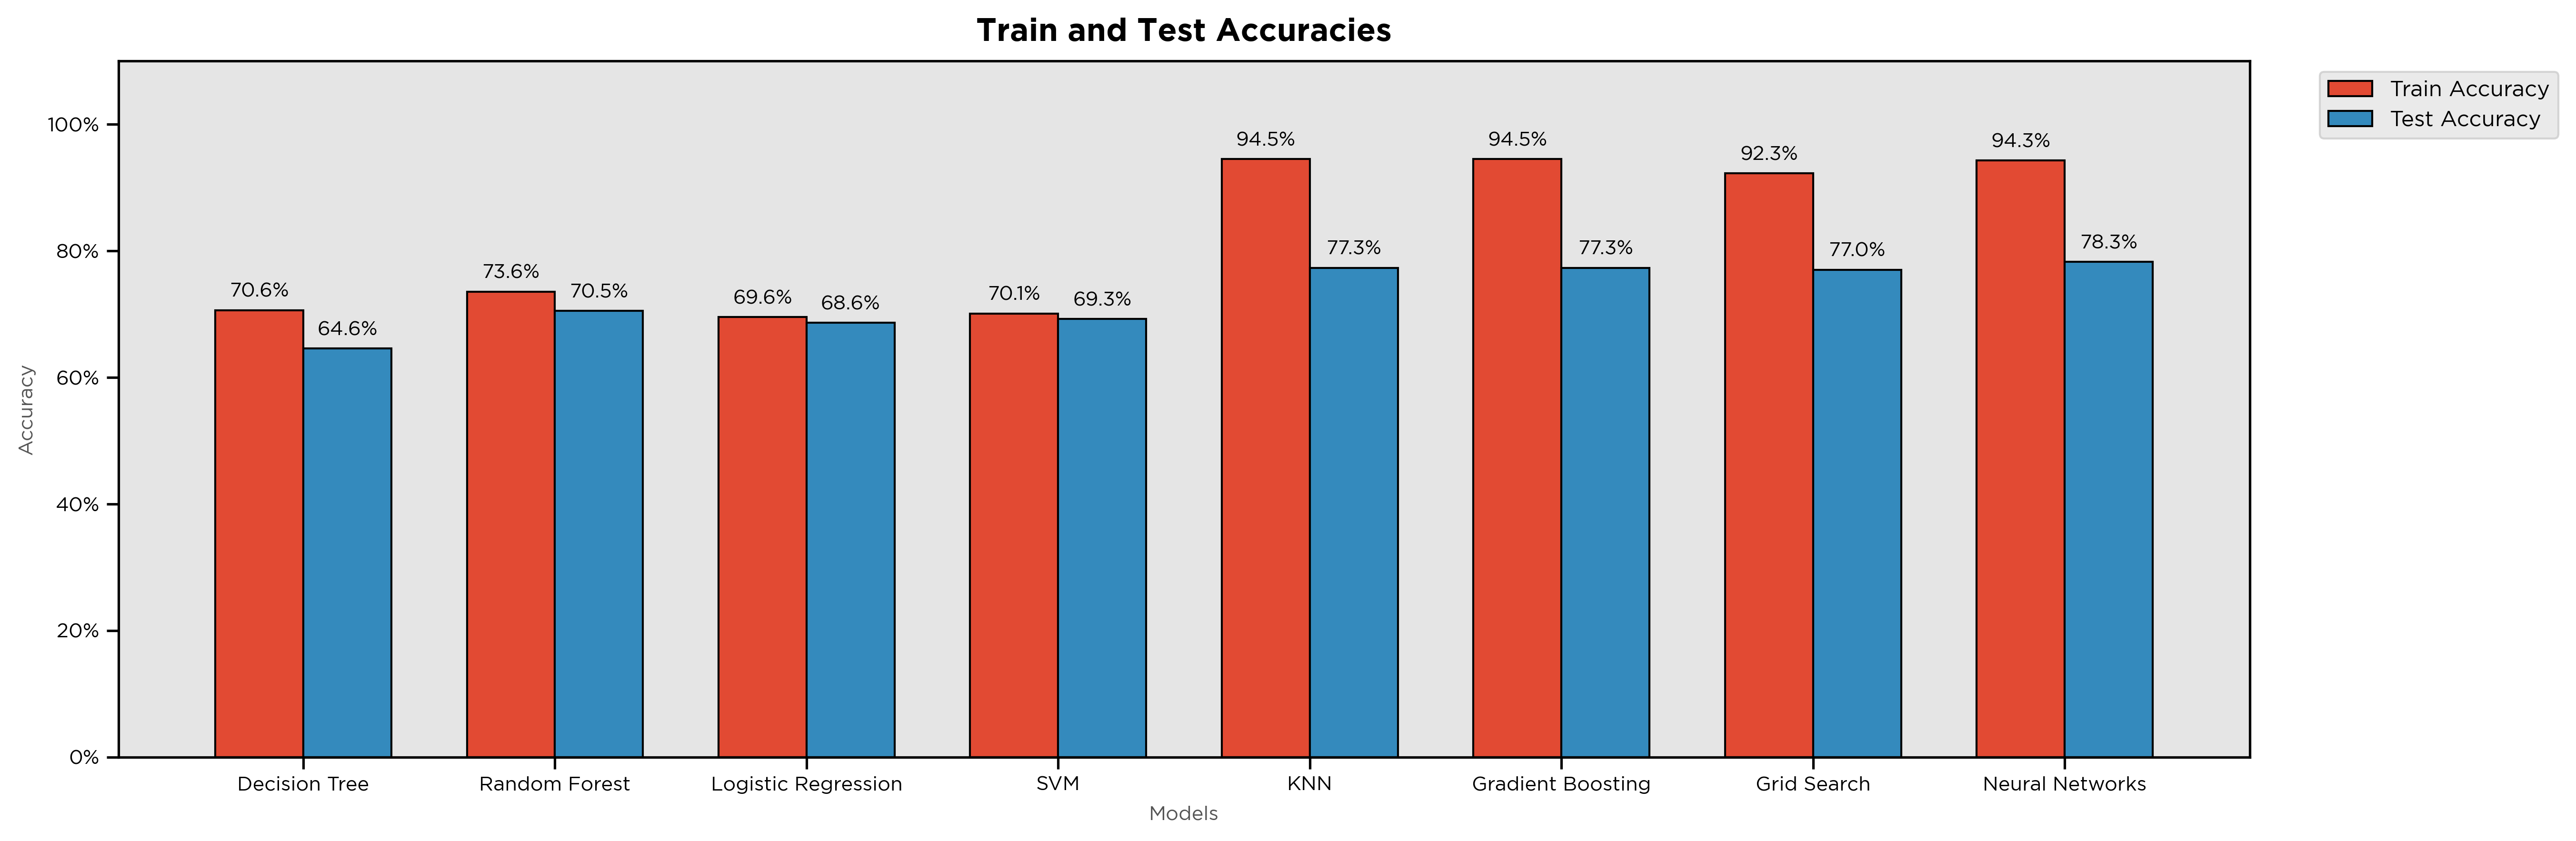

In [22]:
train_test_accuess(
    models,
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    accuracies_results_orig["Train Accuracy"],
    accuracies_results_orig["Test Accuracy"],
    '01_train_test_accuracy_original.png',
    save_path="../figures/02_train"
)

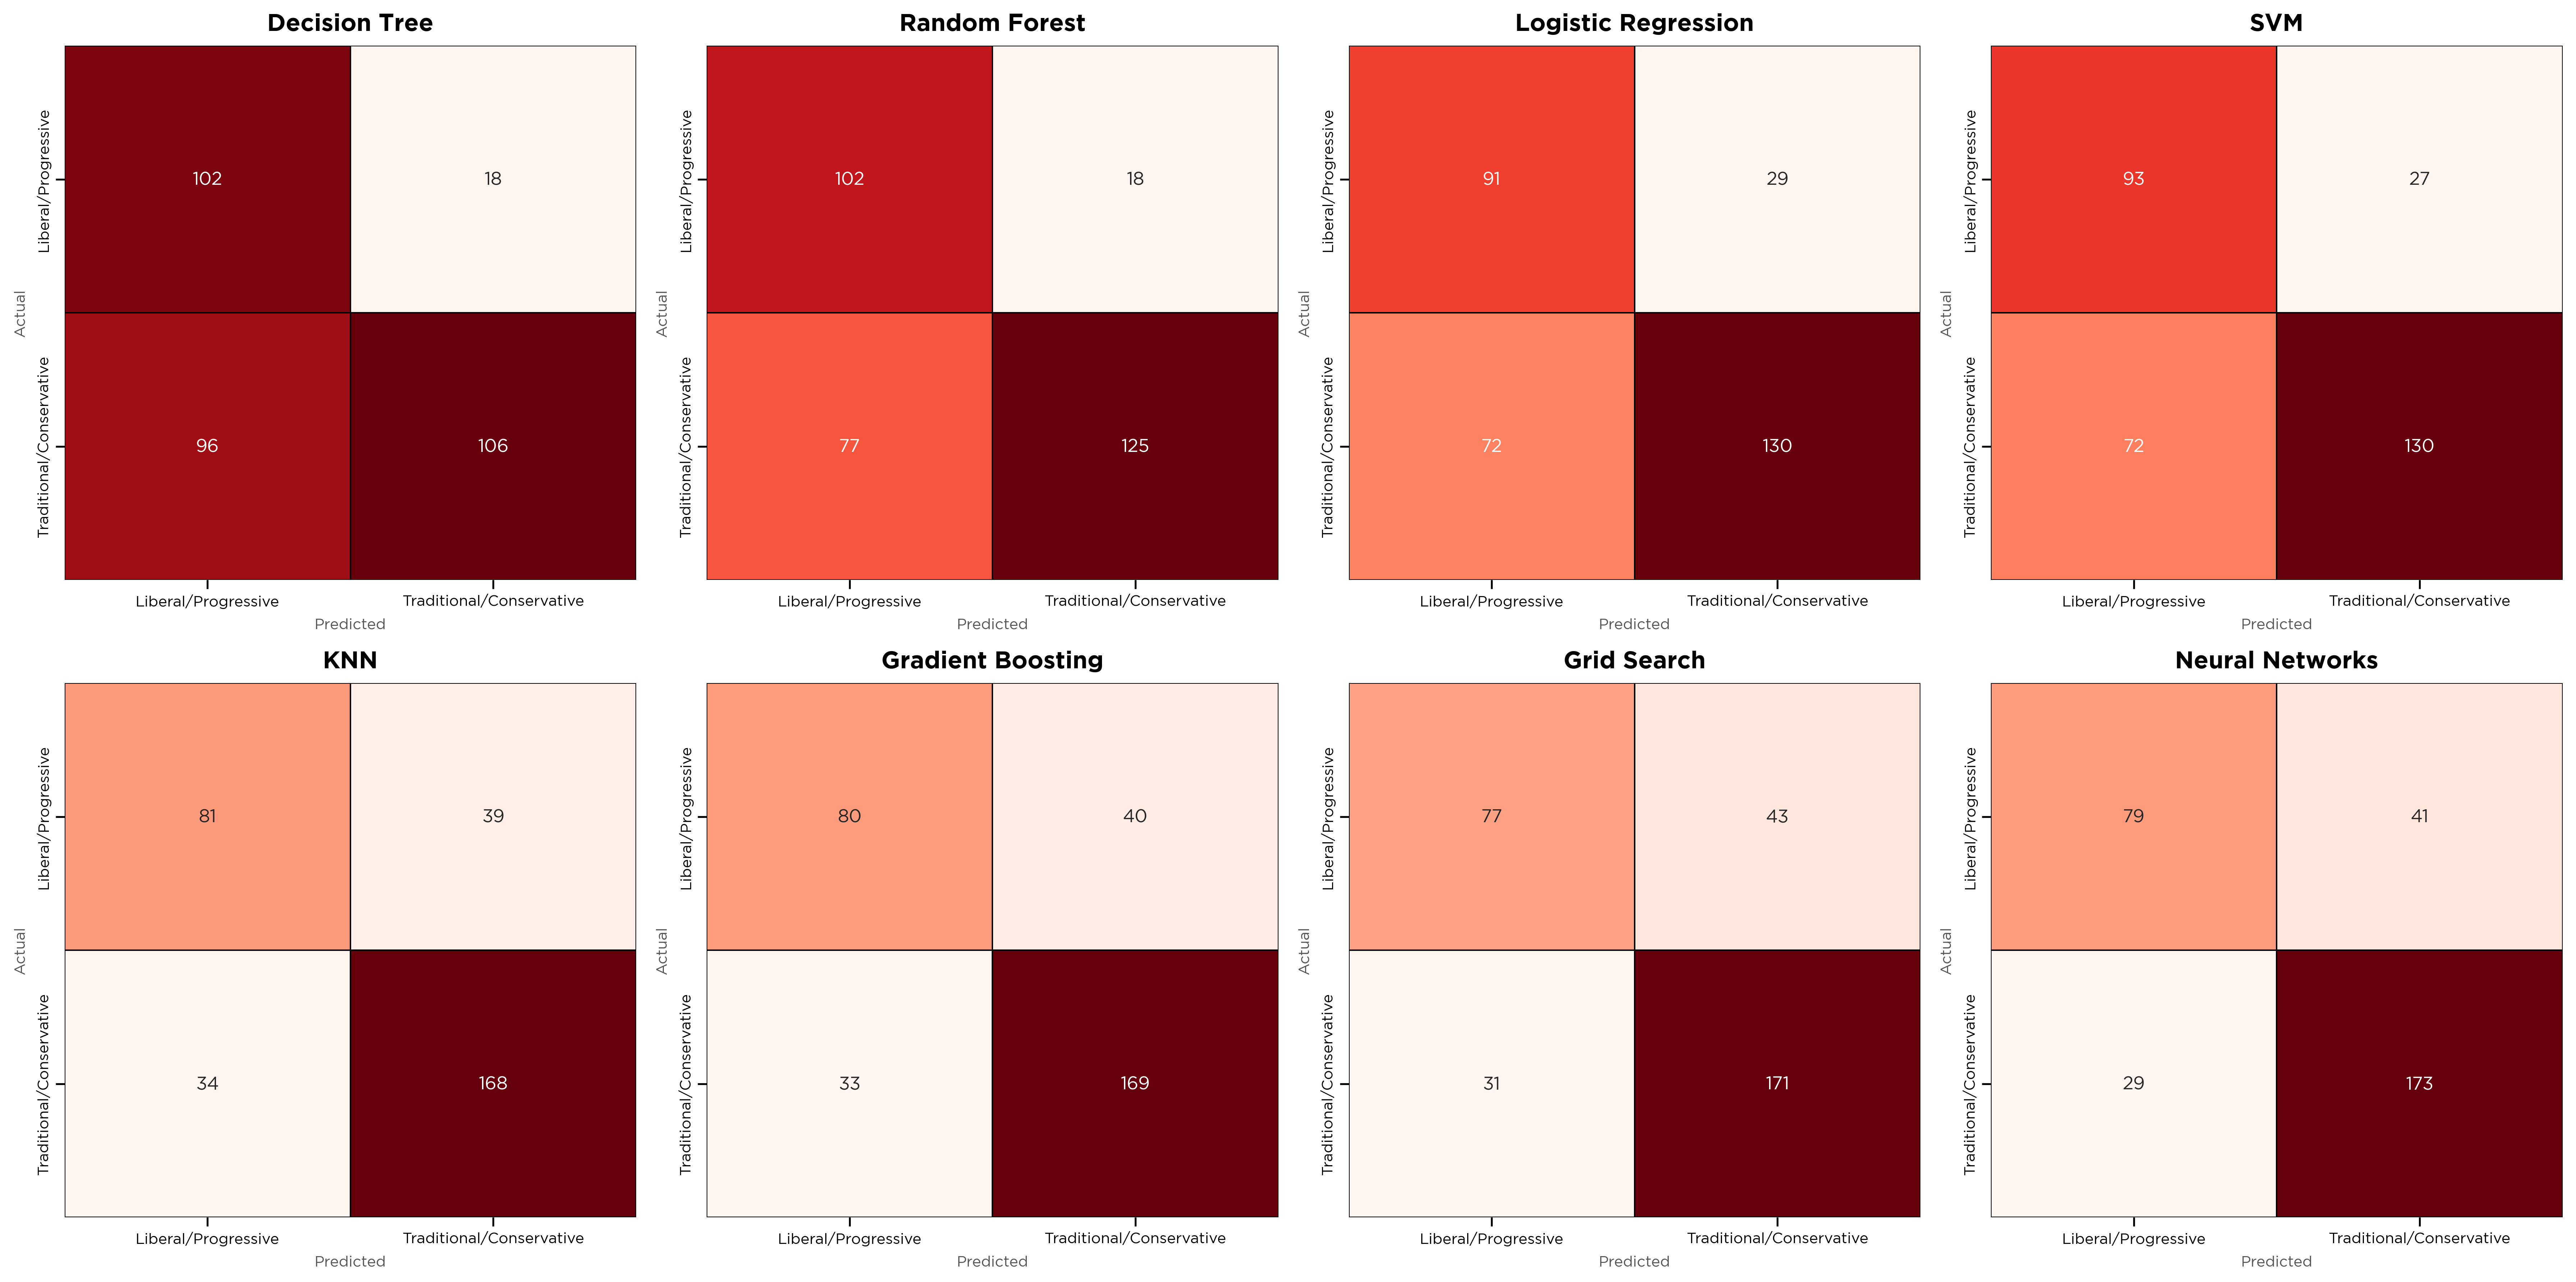

In [23]:
confim(models, X_train_scaled, y_train, X_test_scaled, y_test, 2, 4, '02_confusion_matrix_original.png', save_path="../figures/02_train")

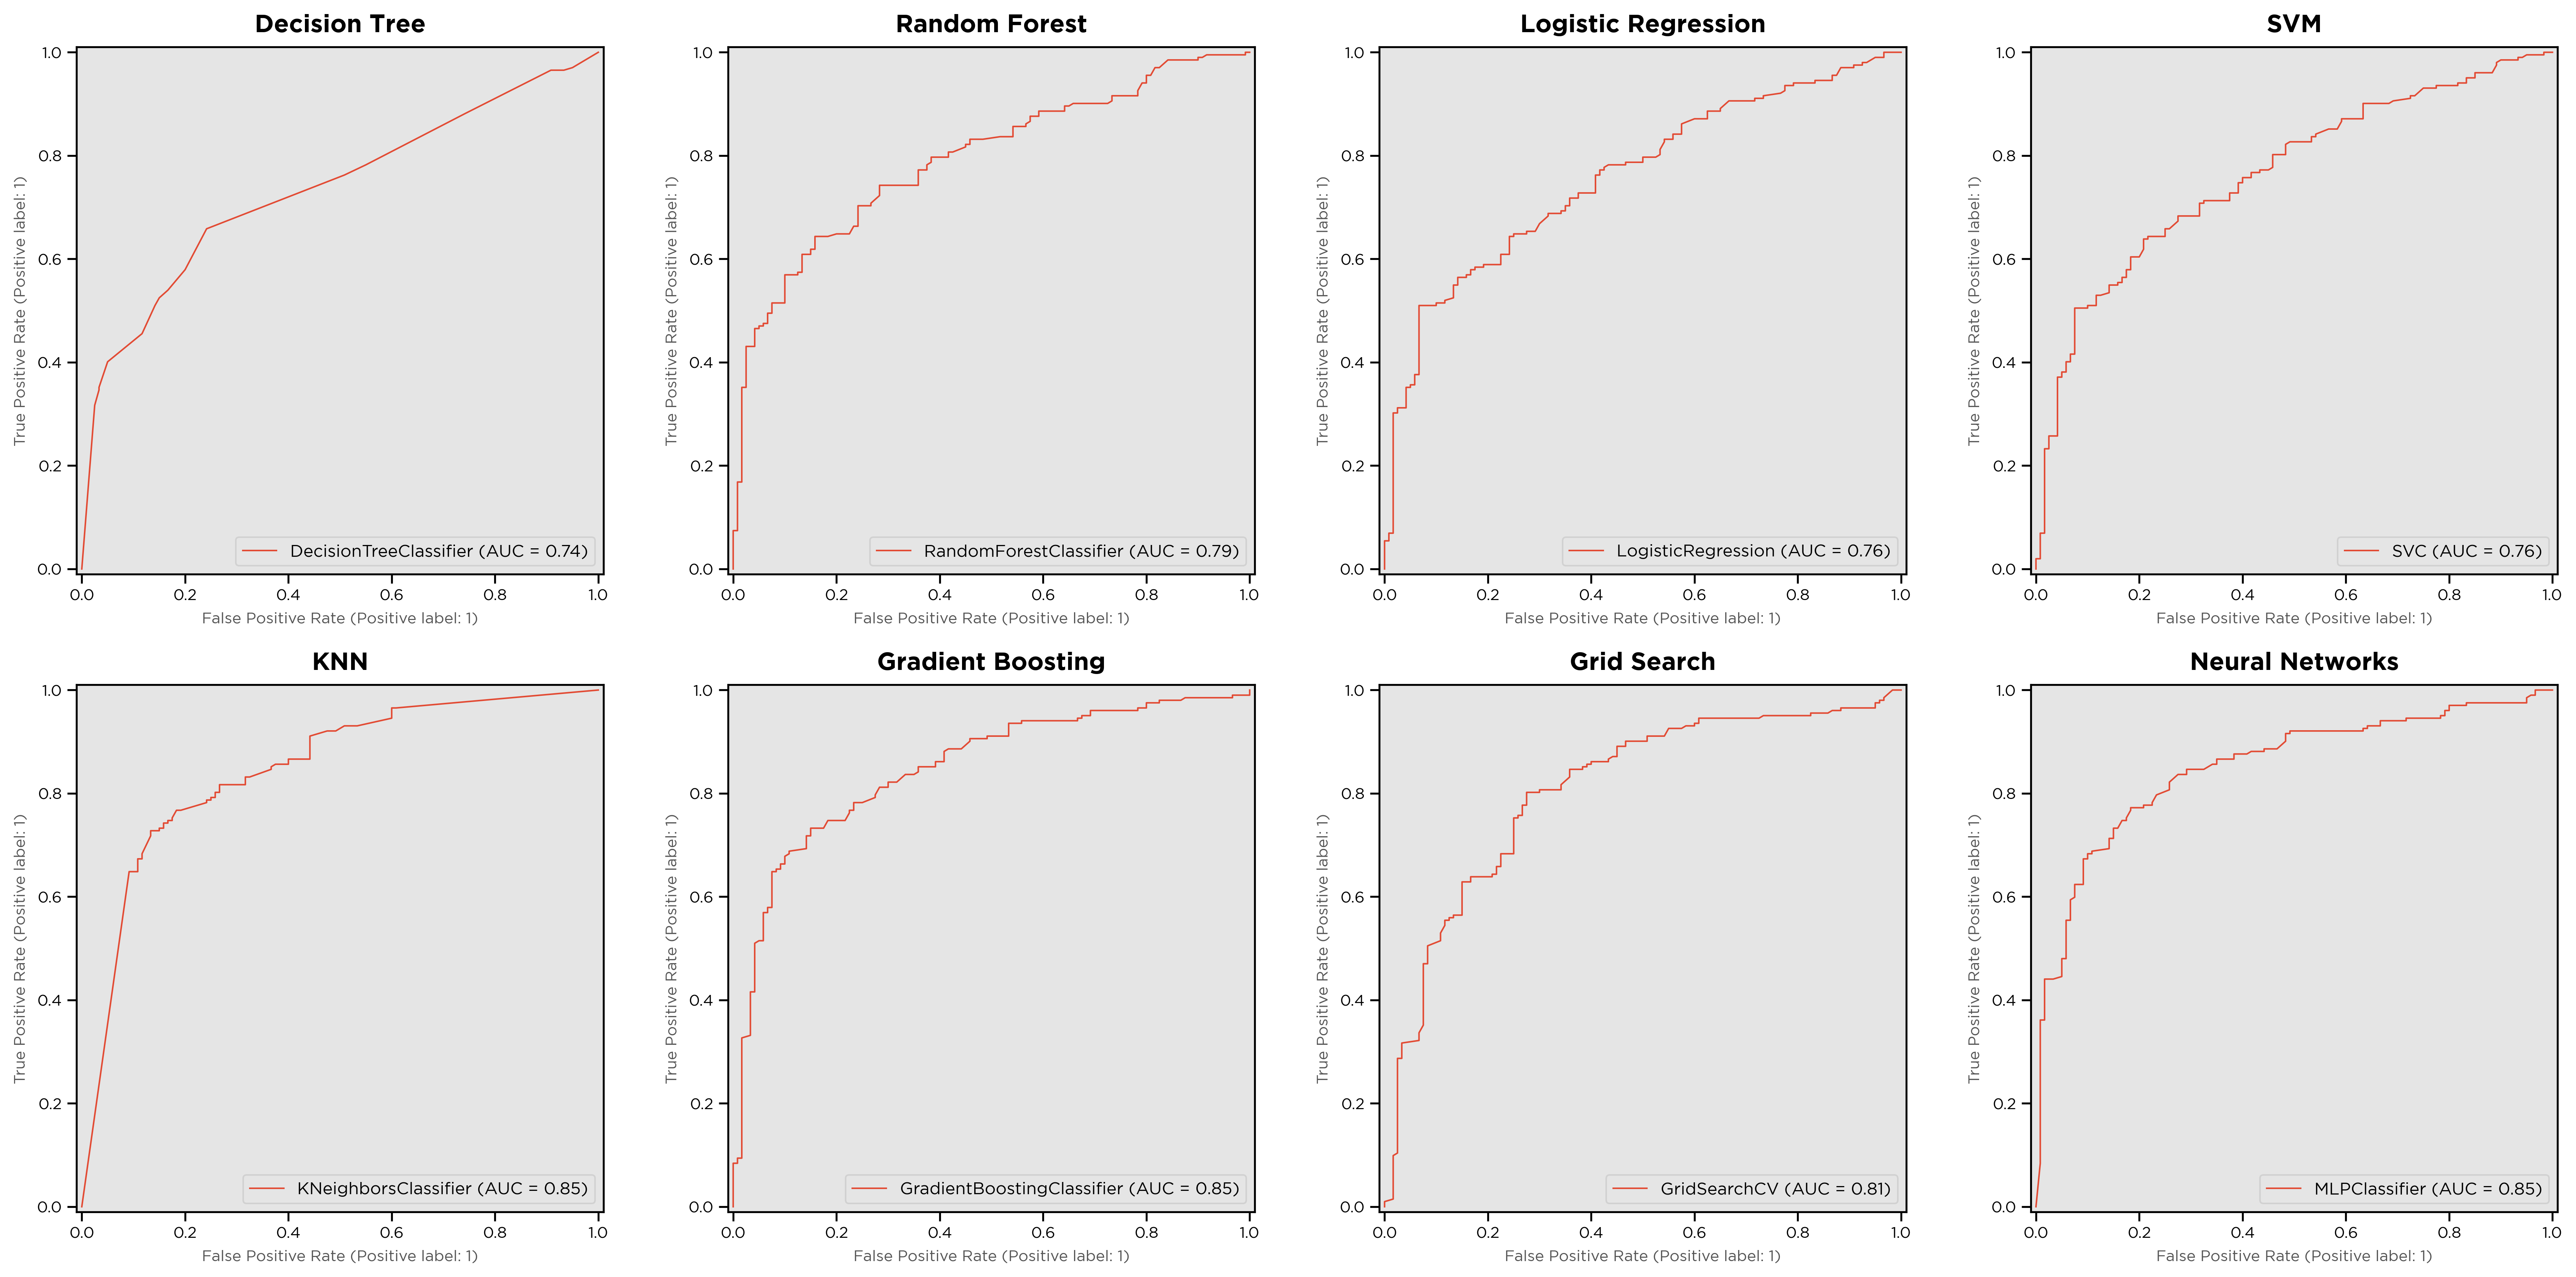

In [24]:
roc_new(models, X_train_scaled, y_train, X_test_scaled, y_test, 2, 4, '03_roc_curve_original.png', save_path="../figures/02_train")

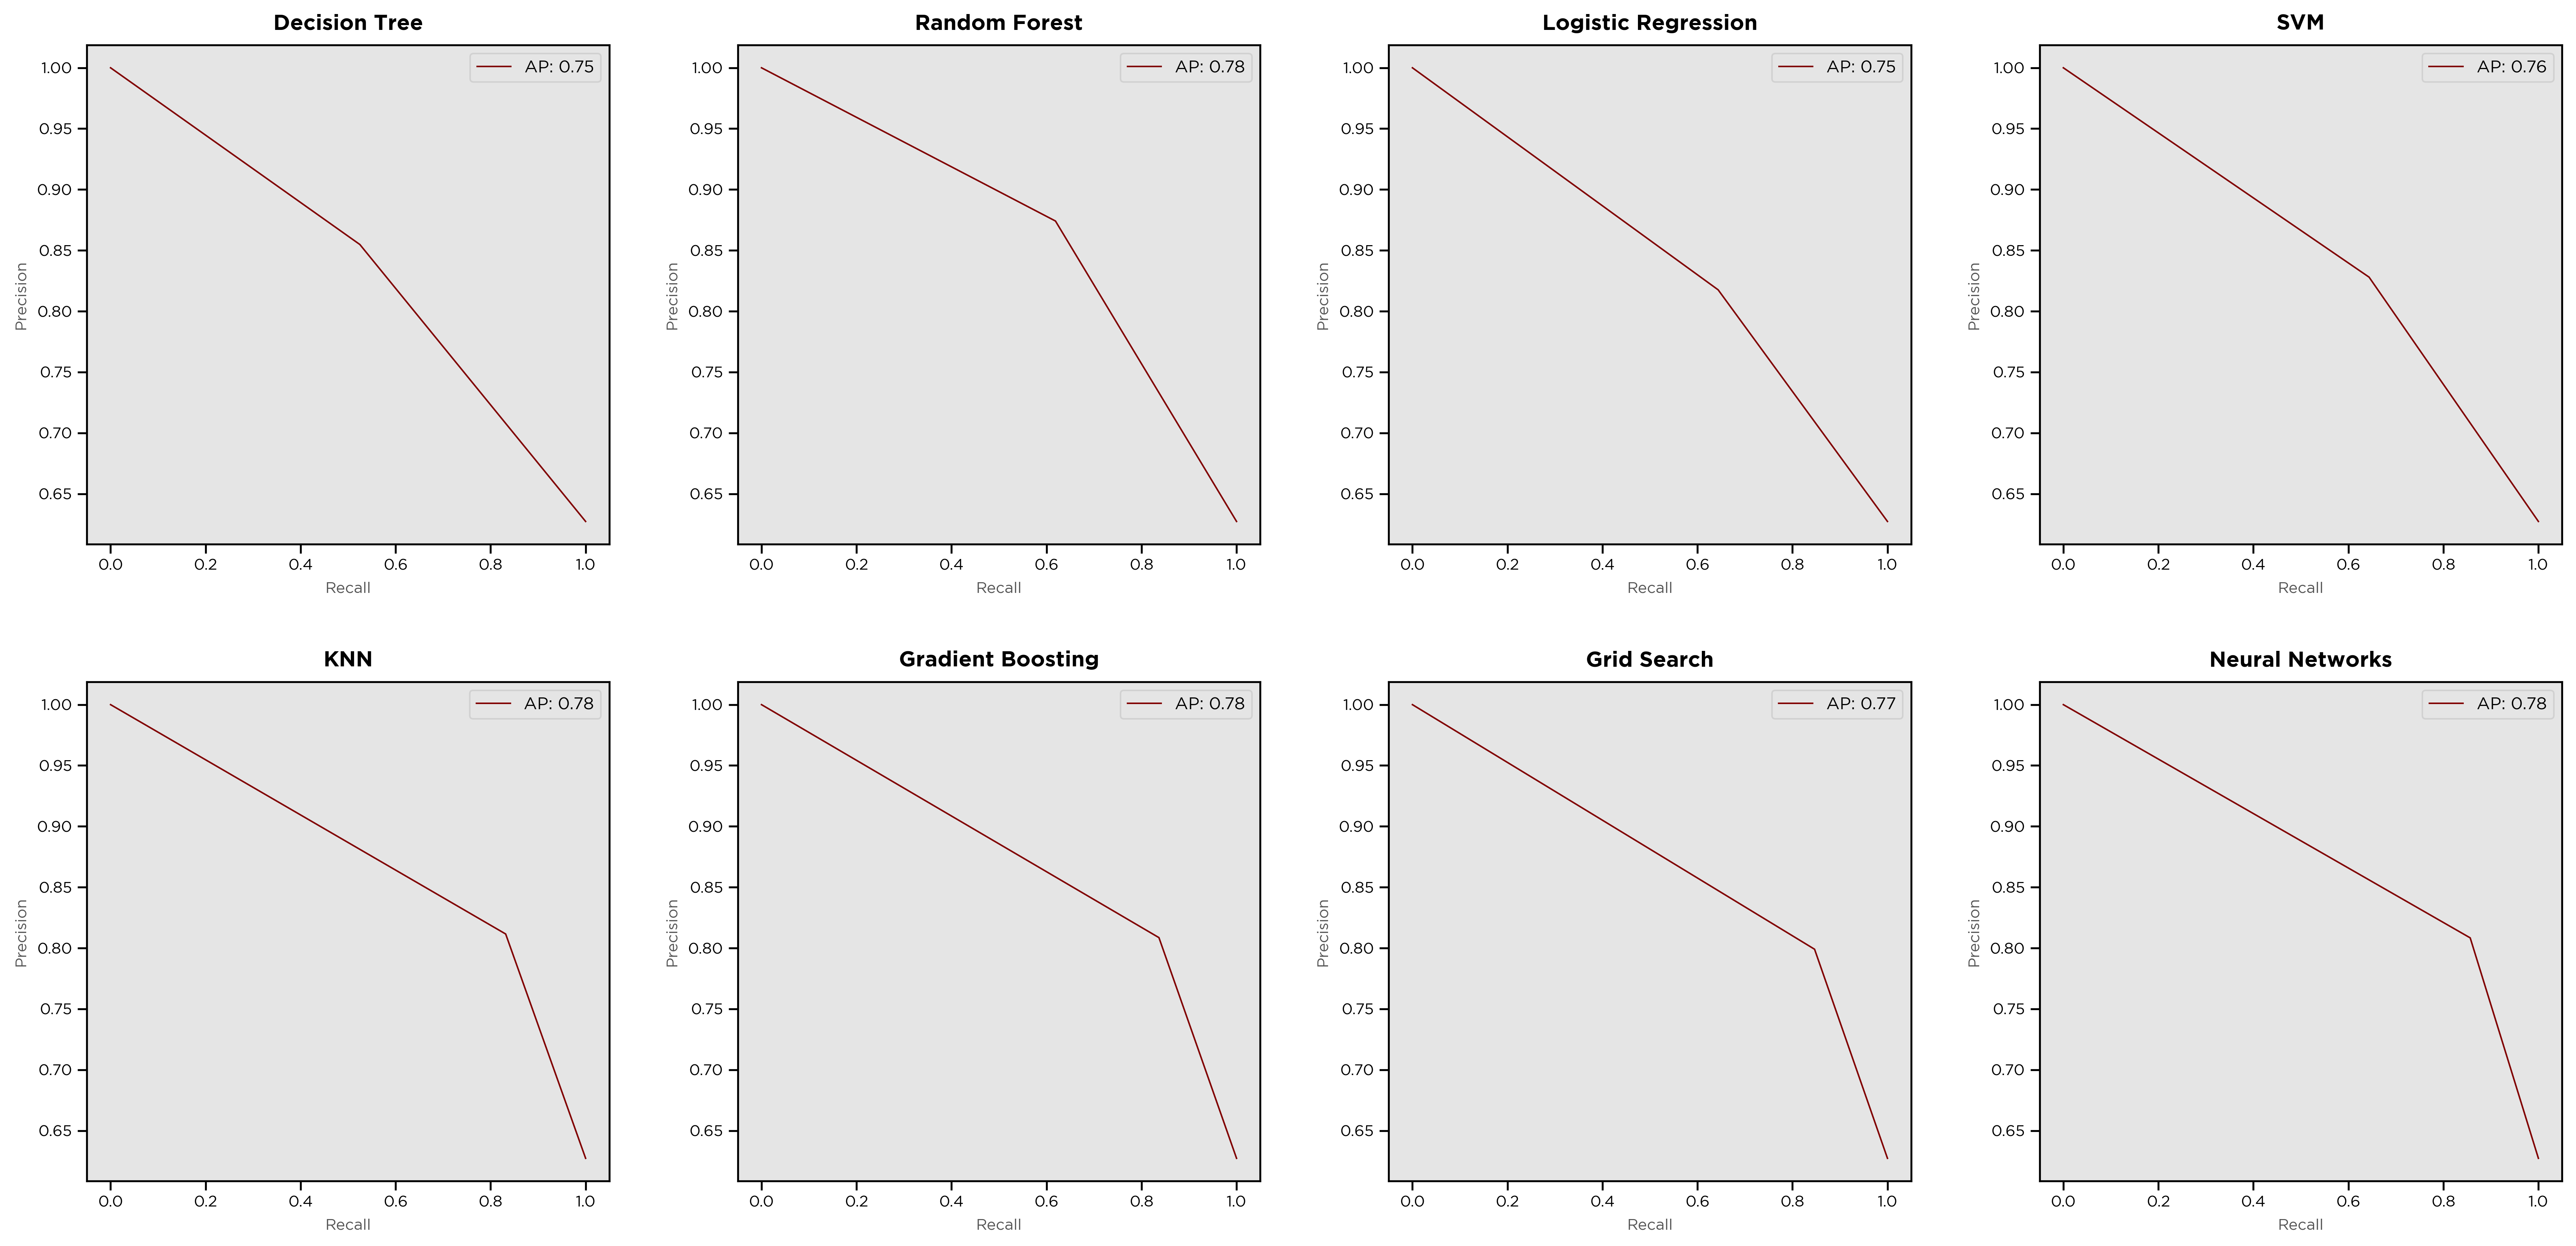

In [25]:
ap(models, X_train_scaled, y_train, X_test_scaled, y_test, 2, 4, '04_ap_original.png', save_path="../figures/02_train")

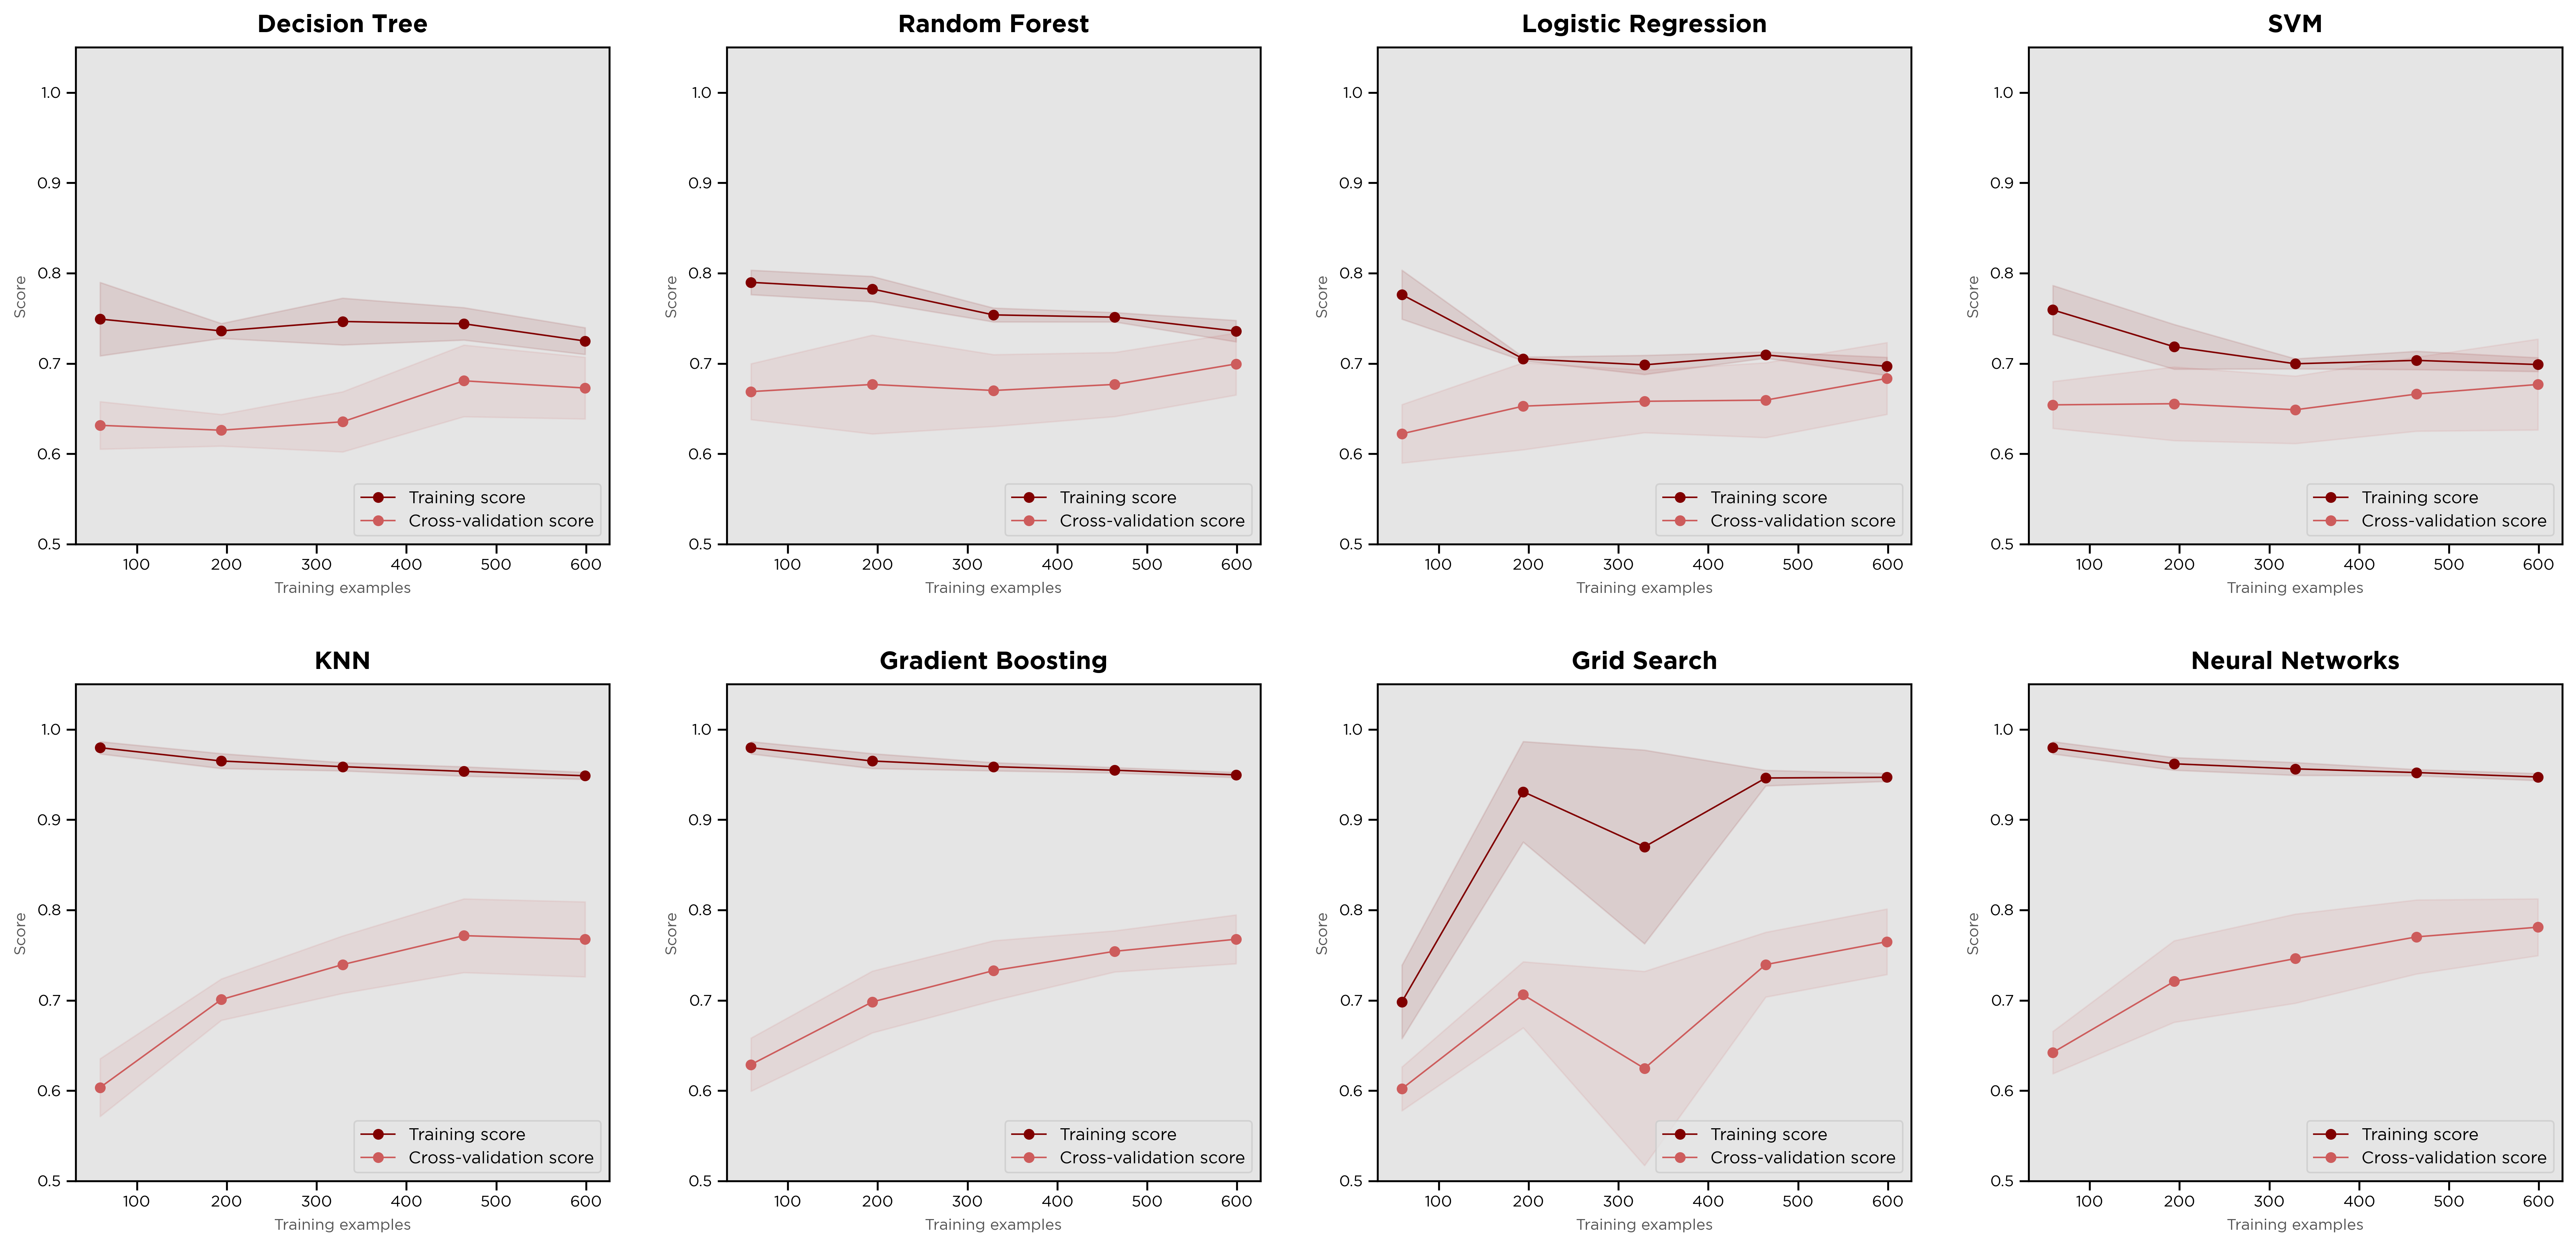

In [26]:
crossval(models, X_train_scaled, y_train, X_test_scaled, y_test, 2, 4, '05_crossval_original.png', save_path="../figures/02_train")

### Resampled

In [27]:
from imblearn.combine import SMOTEENN, SMOTETomek

X1 = df_train.drop("Political Affiliation", axis=1)
y1 = df_train["Political Affiliation"]

smote_tomek = SMOTEENN(random_state=1123, sampling_strategy="auto")

X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X1, y1)

In [28]:
X_train_smotetom, X_test_smotetom, y_train_smotetom, y_test_smotetom = train_test_split(
    X_smote_tomek, y_smote_tomek, test_size=0.3, random_state=1123
)

In [29]:
X_train_smotetom_scaled = scaler.fit_transform(X_train_smotetom)
X_test_smotetom_scaled = scaler.transform(X_test_smotetom)

In [30]:
for name, model in models.items():
    model.fit(X_train_smotetom_scaled, y_train_smotetom)
    y_pred_res = model.predict(X_test_smotetom_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test_smotetom, y_pred_res)}")
    print(
        f"{name} Classification Report:\n{classification_report(y_test_smotetom, y_pred_res)}"
    )
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test_smotetom, y_pred_res)}")
    print()

# Make the results into dataframe
result_list_res = []
for name, model in models.items():
    y_pred_res = model.predict(X_test_smotetom_scaled)
    results_data = {
        "Model": name,
        "Accuracy": accuracy_score(y_test_smotetom, y_pred_res),
        "Precision": precision_score(y_test_smotetom, y_pred_res),
        "Recall": recall_score(y_test_smotetom, y_pred_res),
        "F1 Score": f1_score(y_test_smotetom, y_pred_res),
    }

    result_list_res.append(pd.DataFrame([results_data]))

results_res = pd.concat(result_list_res, ignore_index=True)

accuracies_results_res = []
# Make table for the accuracies in train and test
for name, model in models.items():
    # Train accuracy
    y_pred_res = model.predict(X_train_smotetom_scaled)
    train_accuracy_res = accuracy_score(y_train_smotetom, y_pred_res)
    # Test accuracy
    y_pred_res = model.predict(X_test_smotetom_scaled)
    test_accuracy_res = accuracy_score(y_test_smotetom, y_pred_res)
    accuracies_results_res.append(
        {
            "Model": name,
            "Train Accuracy": train_accuracy_res,
            "Test Accuracy": test_accuracy_res,
        }
    )

accuracies_results_res = pd.DataFrame(accuracies_results_res)

Decision Tree Accuracy: 0.8240343347639485
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       123
           1       0.83      0.78      0.81       110

    accuracy                           0.82       233
   macro avg       0.83      0.82      0.82       233
weighted avg       0.82      0.82      0.82       233

Decision Tree Confusion Matrix:
[[106  17]
 [ 24  86]]

Random Forest Accuracy: 0.8283261802575107
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       123
           1       0.87      0.75      0.80       110

    accuracy                           0.83       233
   macro avg       0.84      0.82      0.83       233
weighted avg       0.83      0.83      0.83       233

Random Forest Confusion Matrix:
[[111  12]
 [ 28  82]]

Logistic Regression Accuracy: 0.7896995708154506
Logistic Regression Class

In [31]:
print(accuracies_results_res)

                 Model  Train Accuracy  Test Accuracy
0        Decision Tree        0.876384       0.824034
1        Random Forest        0.881919       0.828326
2  Logistic Regression        0.809963       0.789700
3                  SVM        0.815498       0.776824
4                  KNN        1.000000       0.961373
5    Gradient Boosting        1.000000       0.948498
6          Grid Search        1.000000       0.944206
7      Neural Networks        1.000000       0.948498


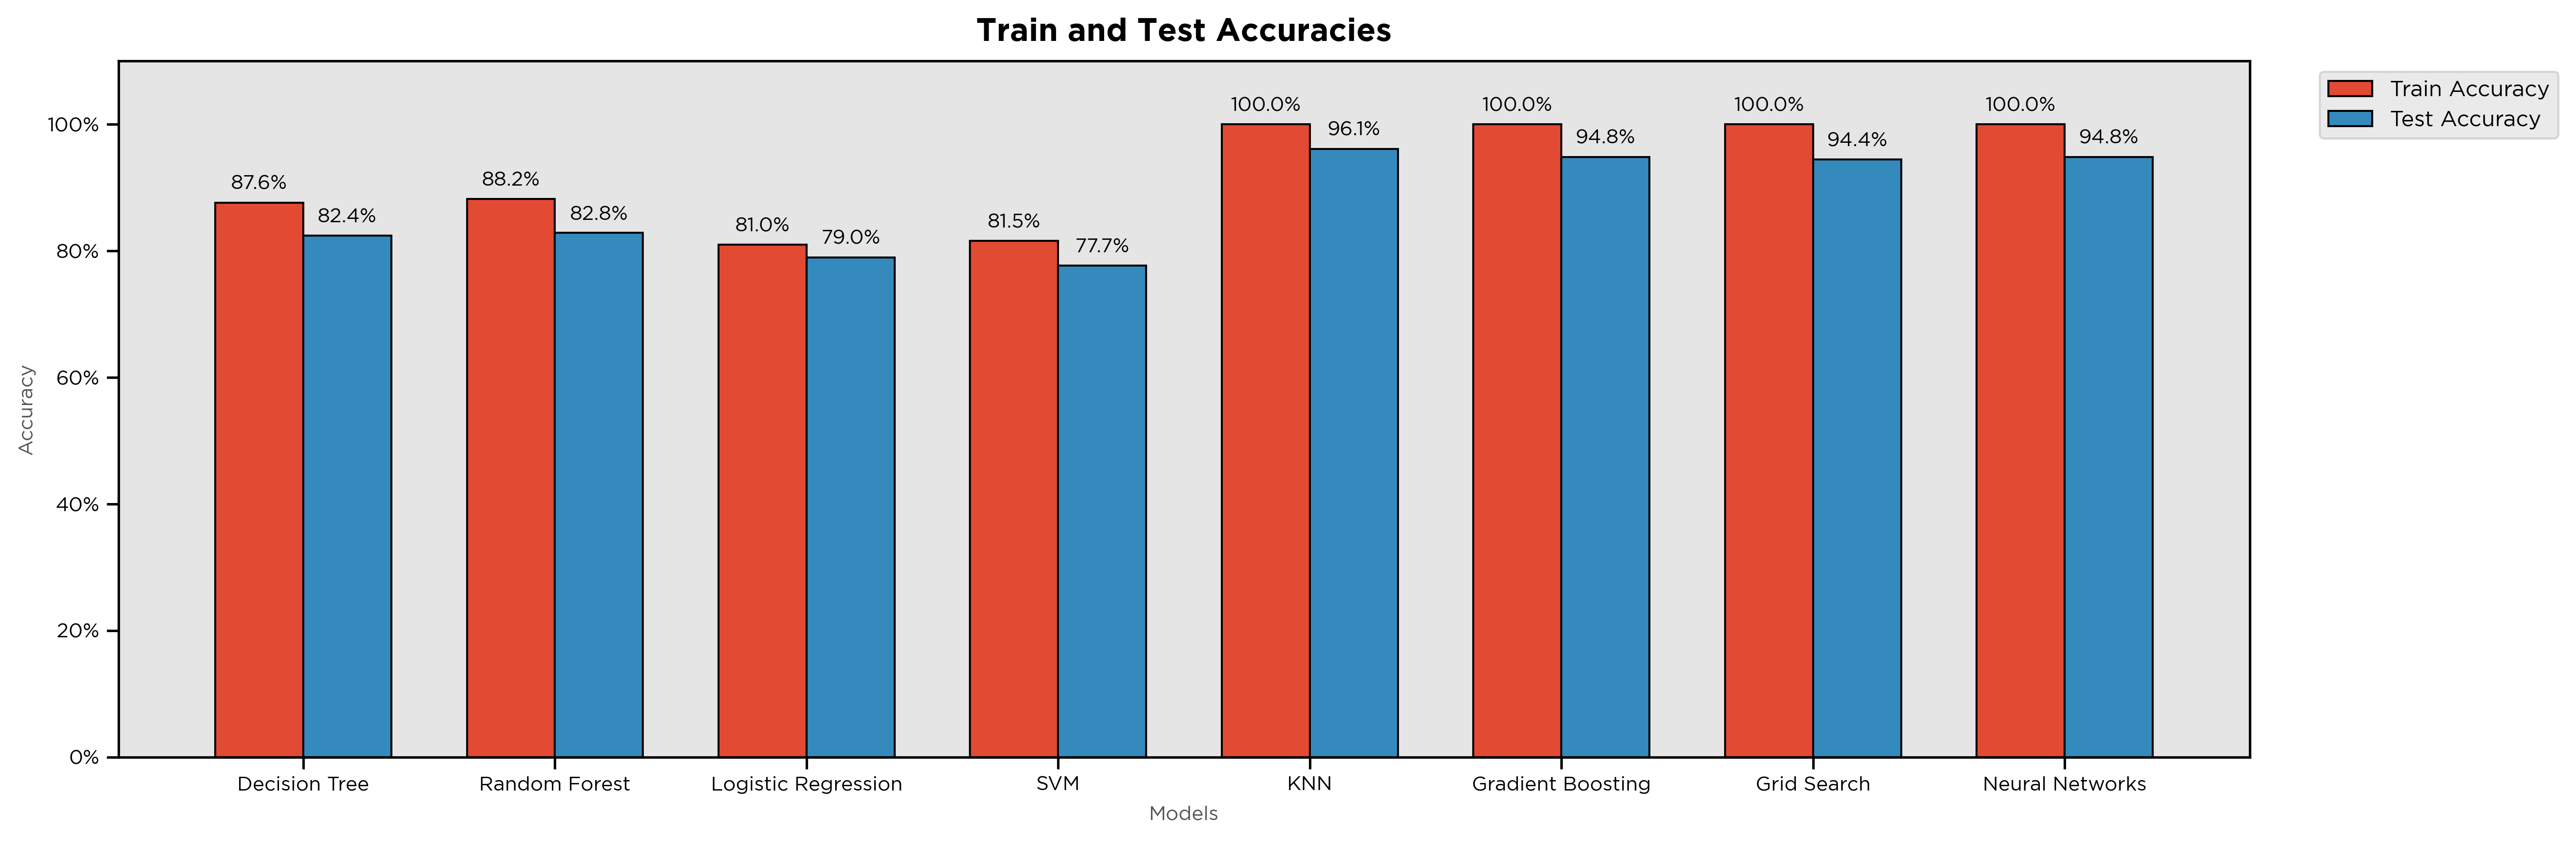

In [32]:
train_test_accuess(
    models,
    X_train_smotetom_scaled,
    y_train_smotetom,
    X_test_smotetom_scaled,
    y_test_smotetom,
    accuracies_results_res["Train Accuracy"],
    accuracies_results_res["Test Accuracy"],
    '06_train_test_accuracy_resampled.png',
    save_path="../figures/02_train"
)

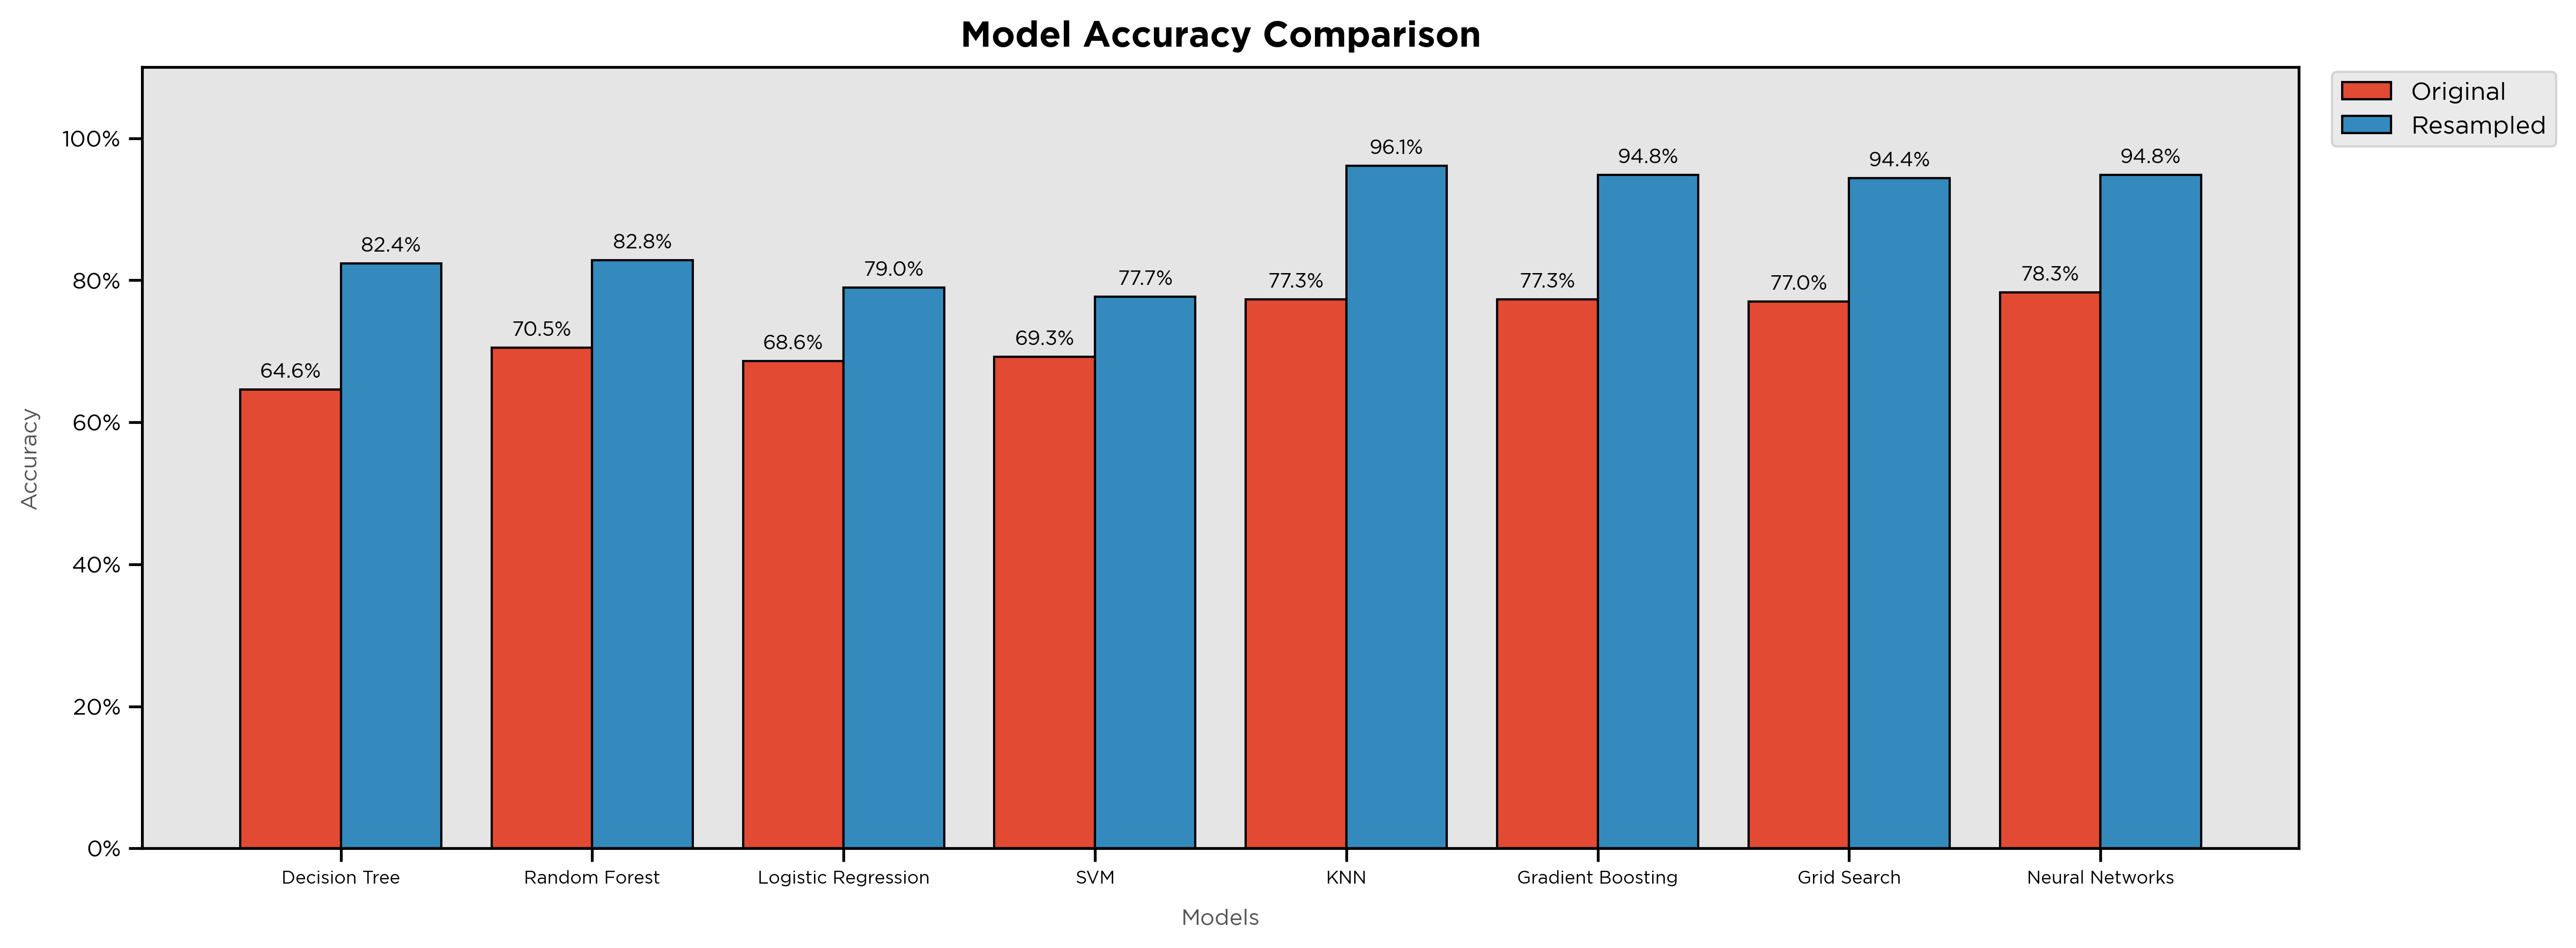

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))
model_names = list(models.keys())

bar_width = 0.4

index = np.arange(len(model_names))

bar1 = ax.bar(
    index,
    results["Accuracy"],
    bar_width,
    label="Original",
    linewidth=1,
    edgecolor="black",
)
bar2 = ax.bar(
    index + bar_width,
    results_res["Accuracy"],
    bar_width,
    label="Resampled",
    linewidth=1,
    edgecolor="black",
)

ax.set_xlabel("Models", labelpad=10)
ax.set_ylabel("Accuracy", labelpad=10)

ax.set_title("Model Accuracy Comparison", fontweight="bold", fontsize=16, y=1.01)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names, fontdict={"fontsize": 8})

ax.set_ylim(0, 1.1)

# format y-ticks as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Annotated the bars, format it by percentage
for bar in bar1 + bar2:
    height = bar.get_height()
    formatted_height = locale.format_string("%.1f", height * 100, grouping=True)
    ax.annotate(
        f"{formatted_height}%",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 4),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )

ax.legend(loc="upper right", bbox_to_anchor=(1.125, 1.01))

plt.tight_layout()
plt.savefig(os.path.join(save_path, "07_accuracy_comparison.png"), dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

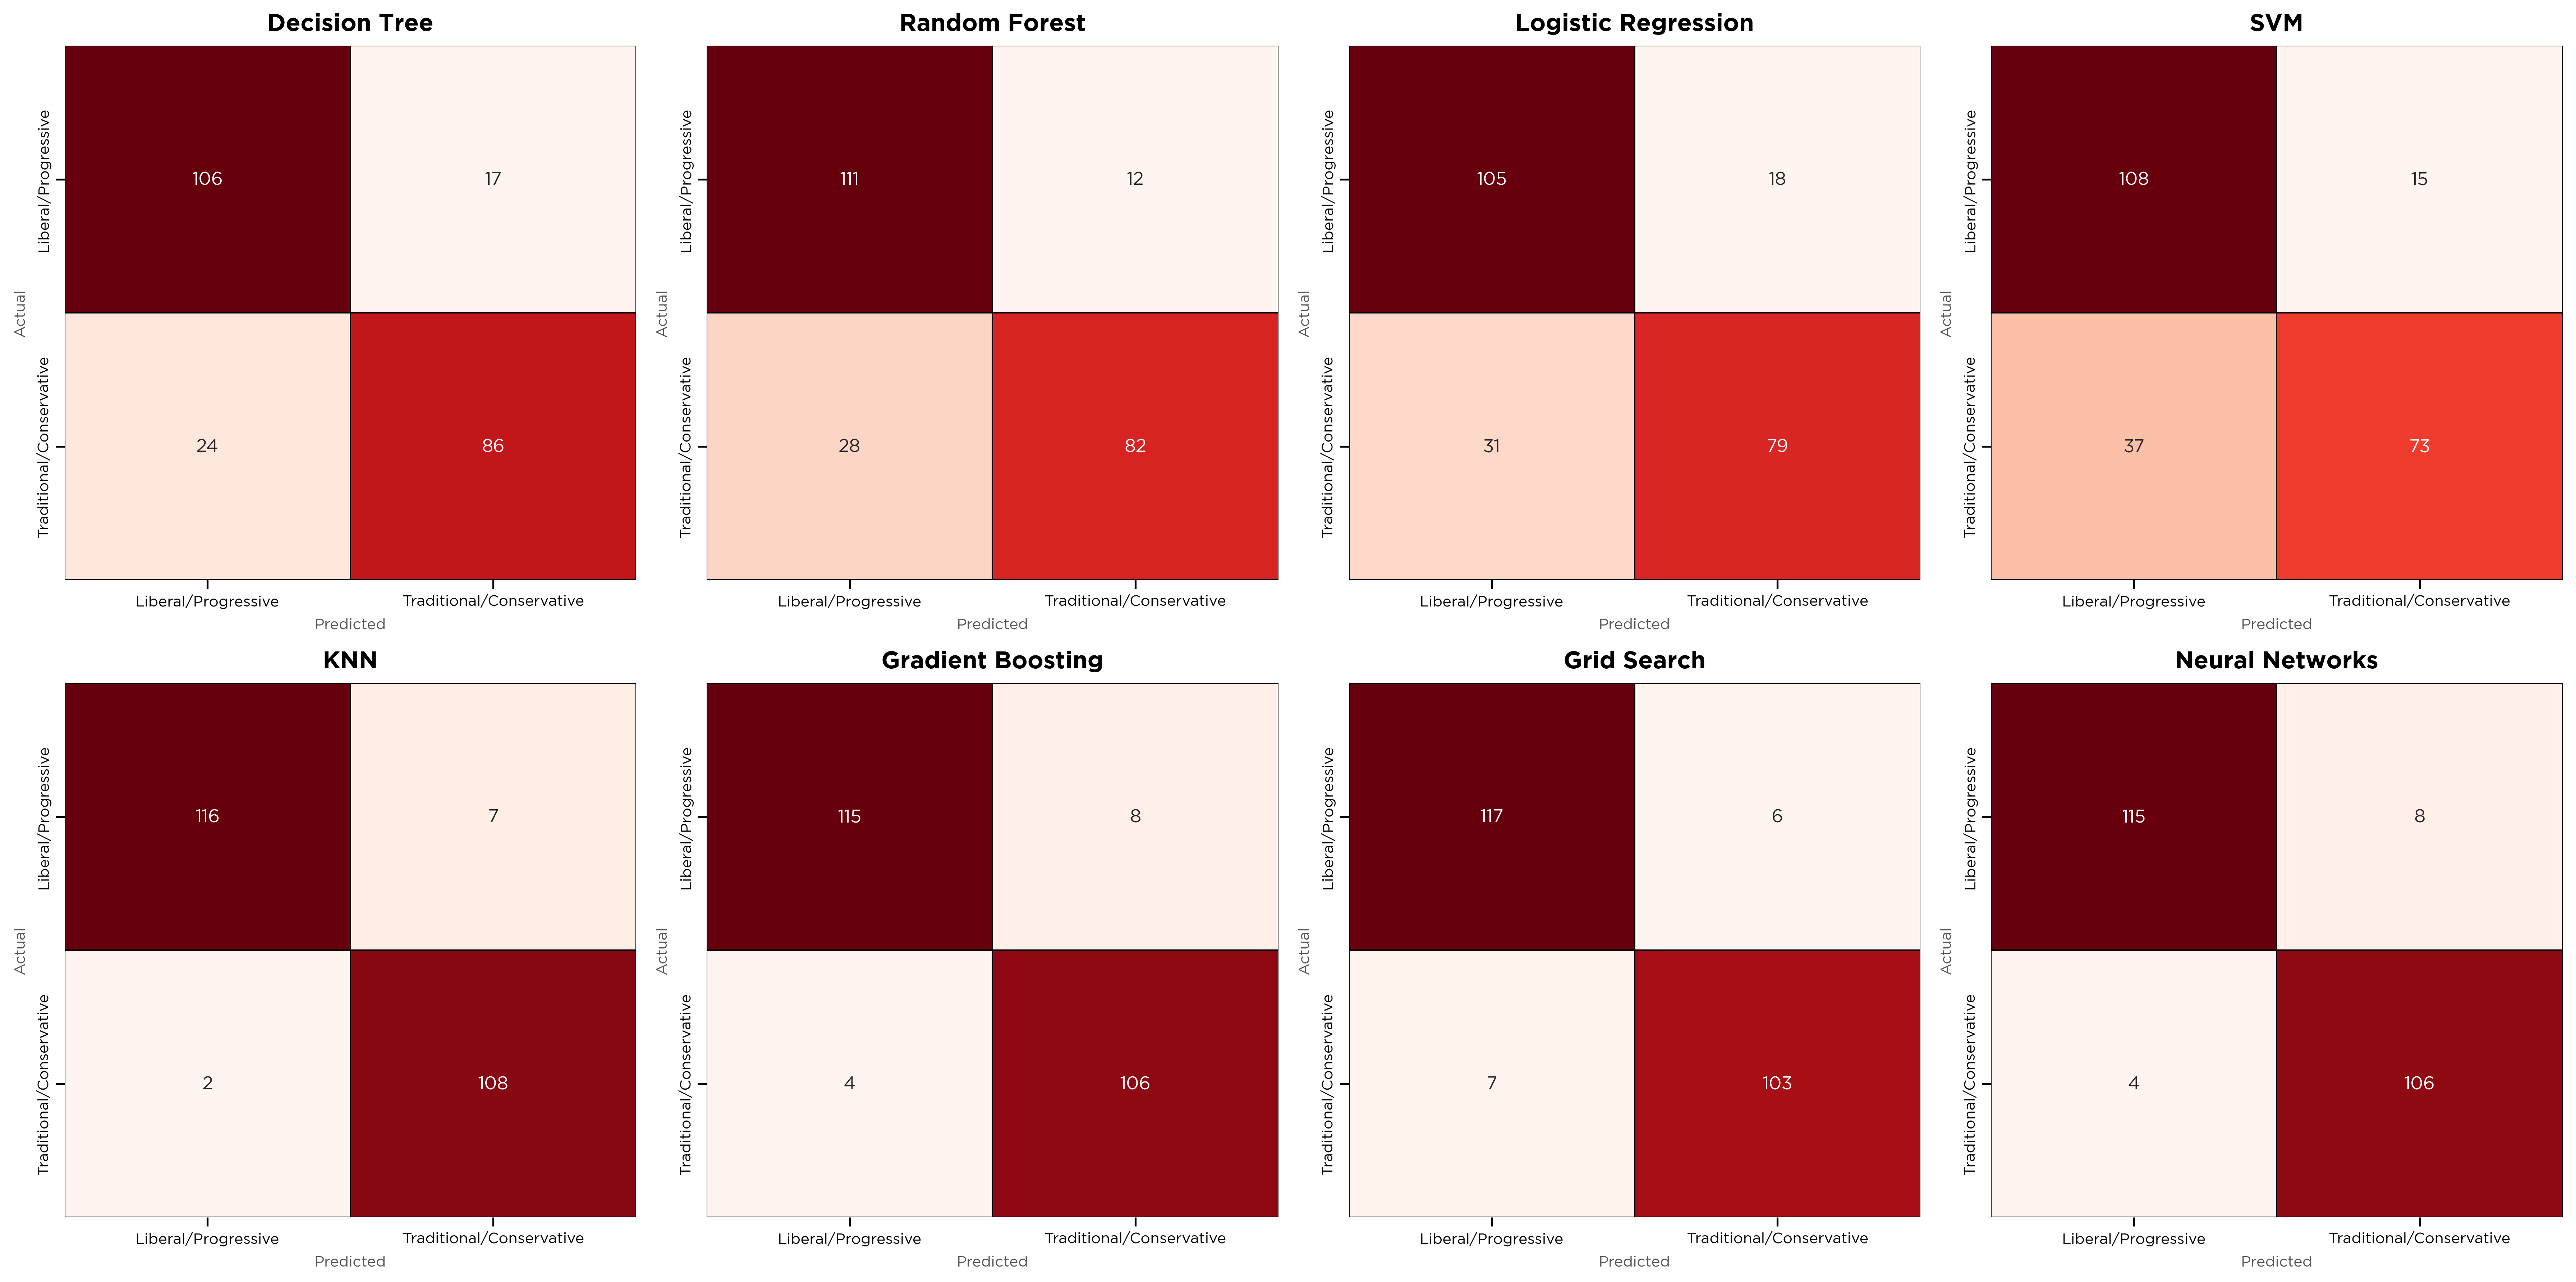

In [34]:
confim(
    models,
    X_train_smotetom_scaled,
    y_train_smotetom,
    X_test_smotetom_scaled,
    y_test_smotetom,
    2,
    4,
    '08_confusion_matrix_resampled.png',
    save_path="../figures/02_train"
)

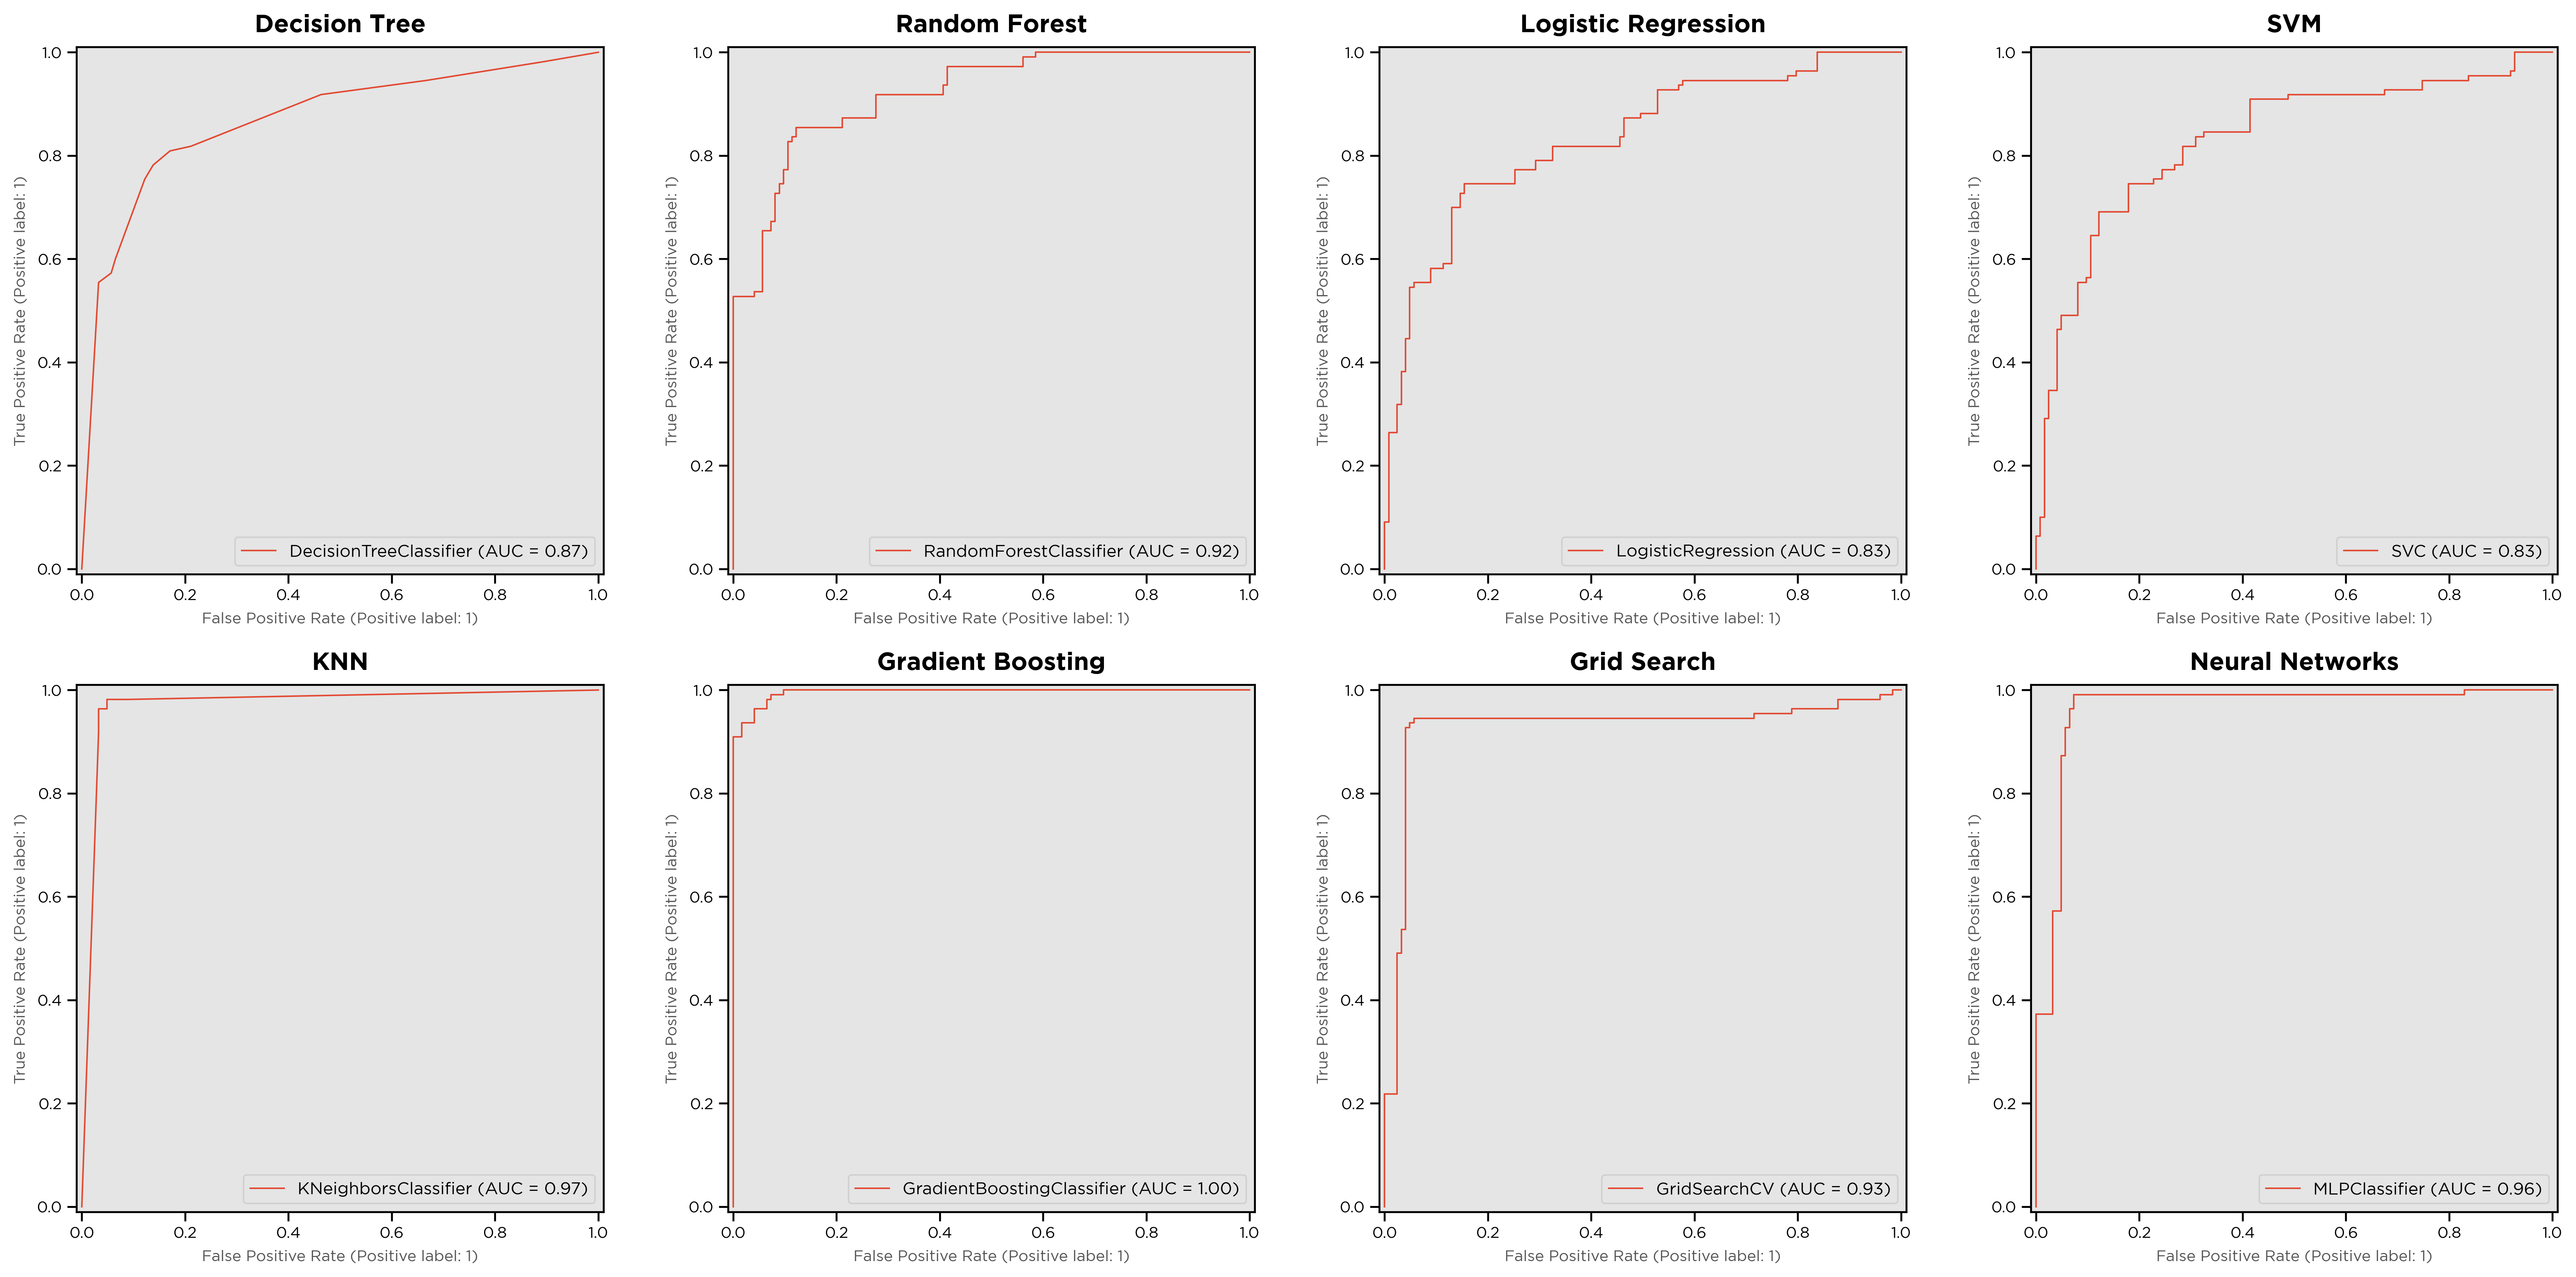

In [35]:
roc_new(
    models,
    X_train_smotetom_scaled,
    y_train_smotetom,
    X_test_smotetom_scaled,
    y_test_smotetom,
    2,
    4,
    '09_roc_curve_resampled.png',
    save_path="../figures/02_train"
)

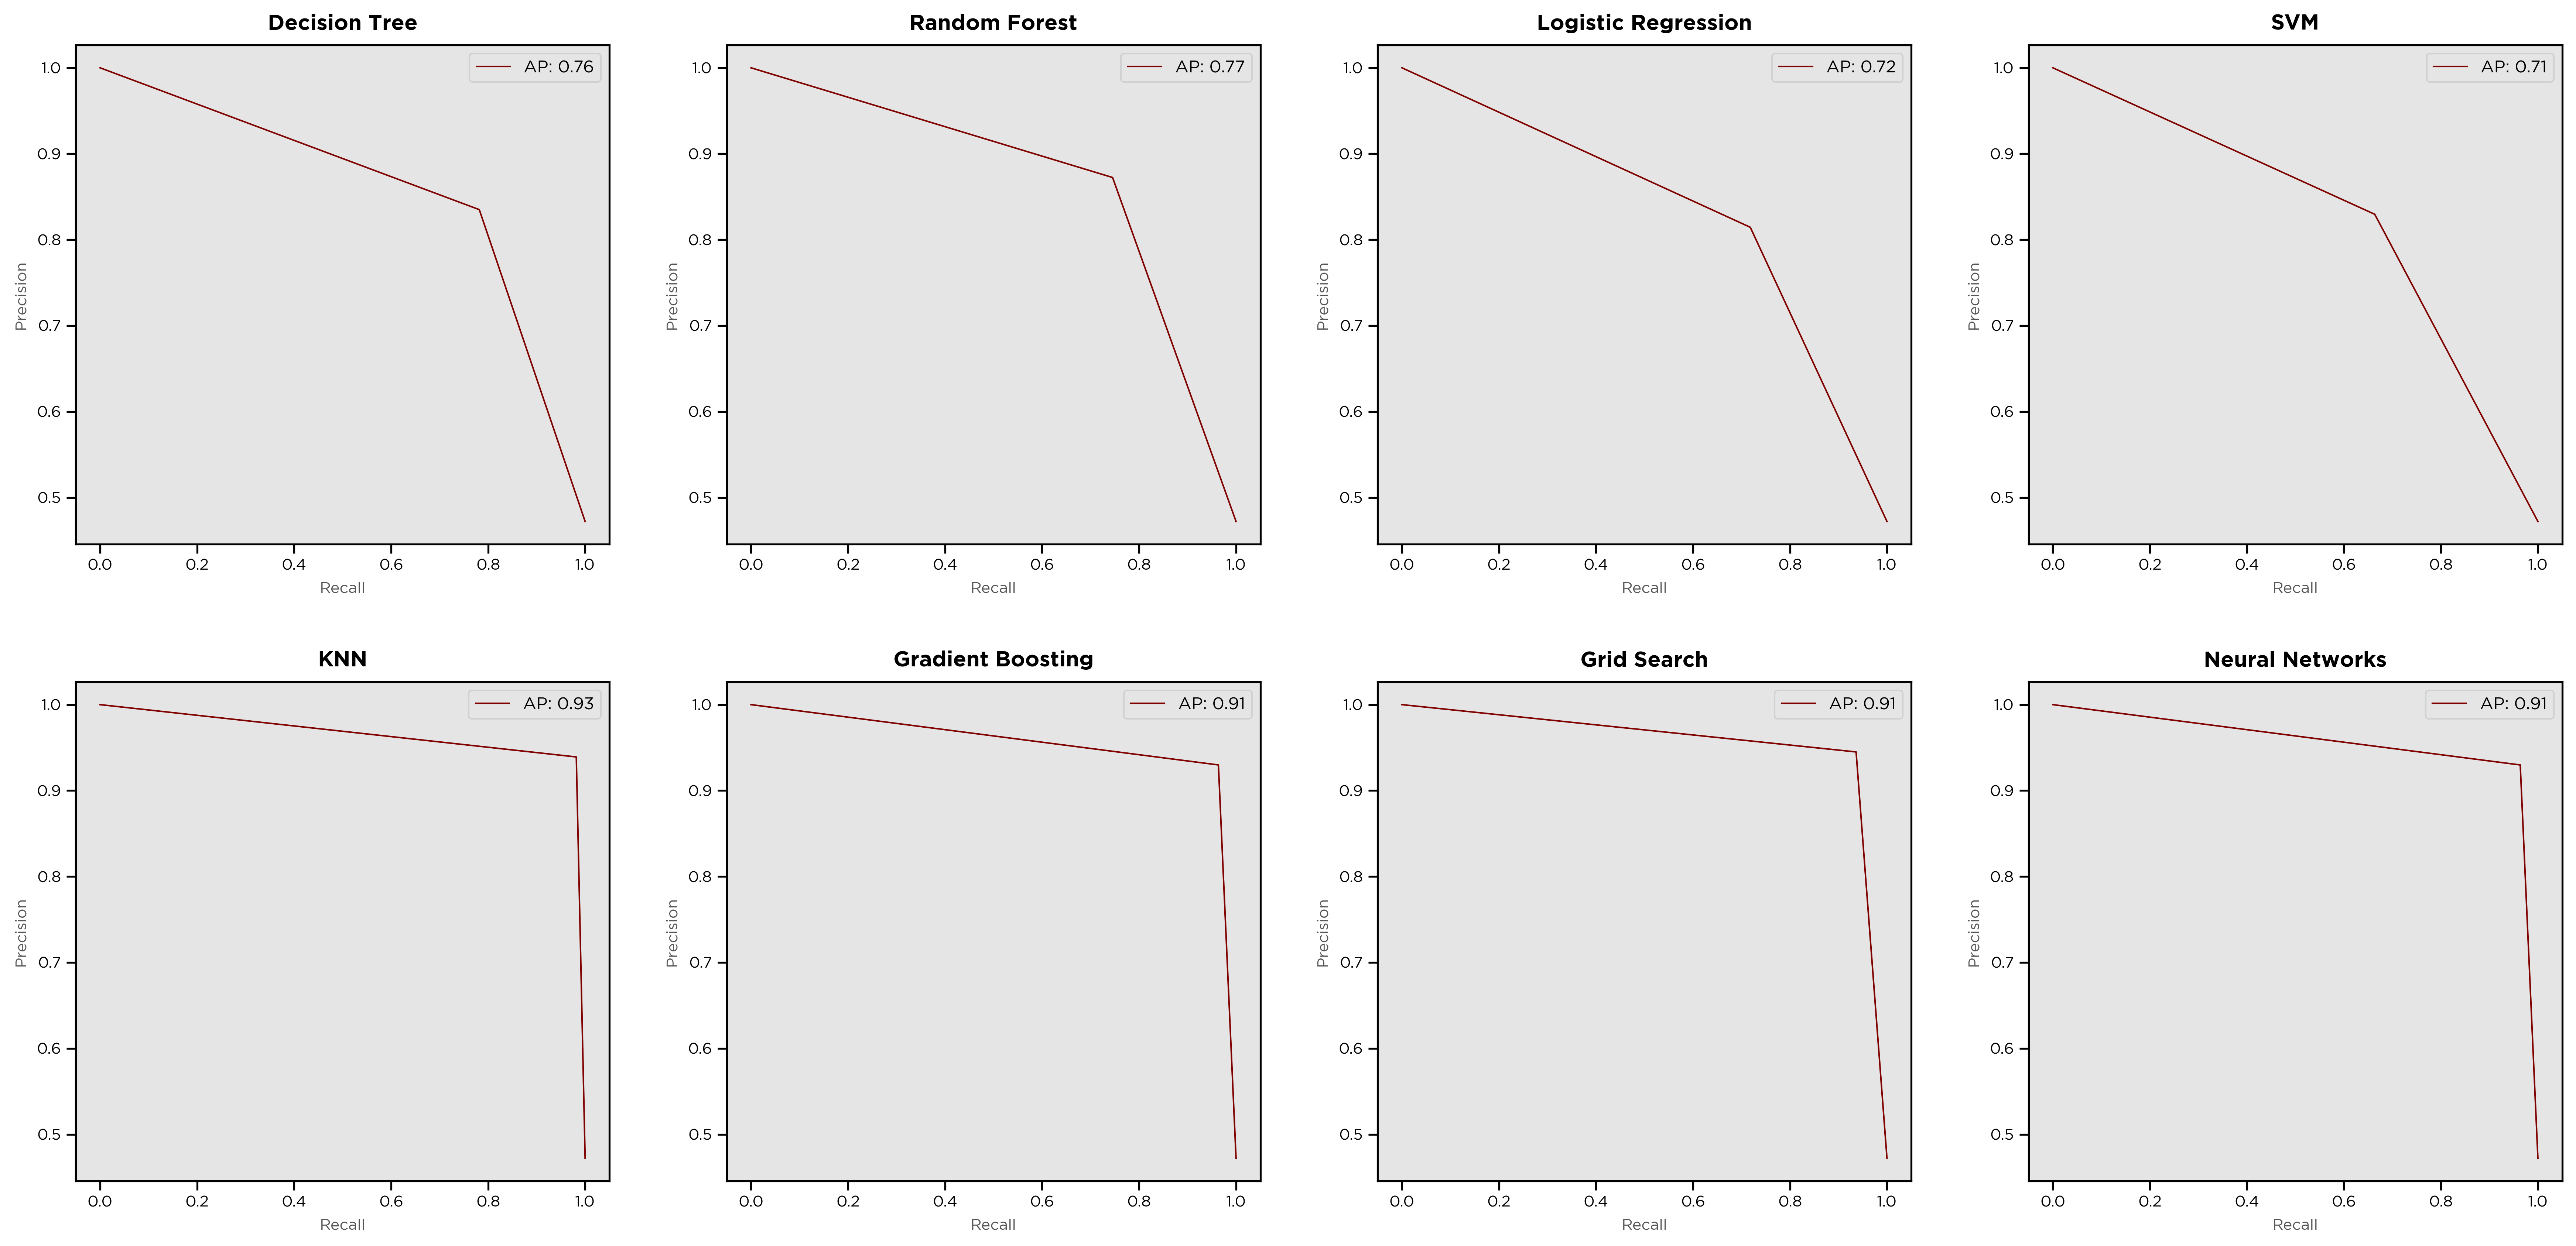

In [36]:
ap(
    models,
    X_train_smotetom_scaled,
    y_train_smotetom,
    X_test_smotetom_scaled,
    y_test_smotetom,
    2,
    4,
    '10_precision_recall_curve_resampled.png',
    save_path="../figures/02_train"
)

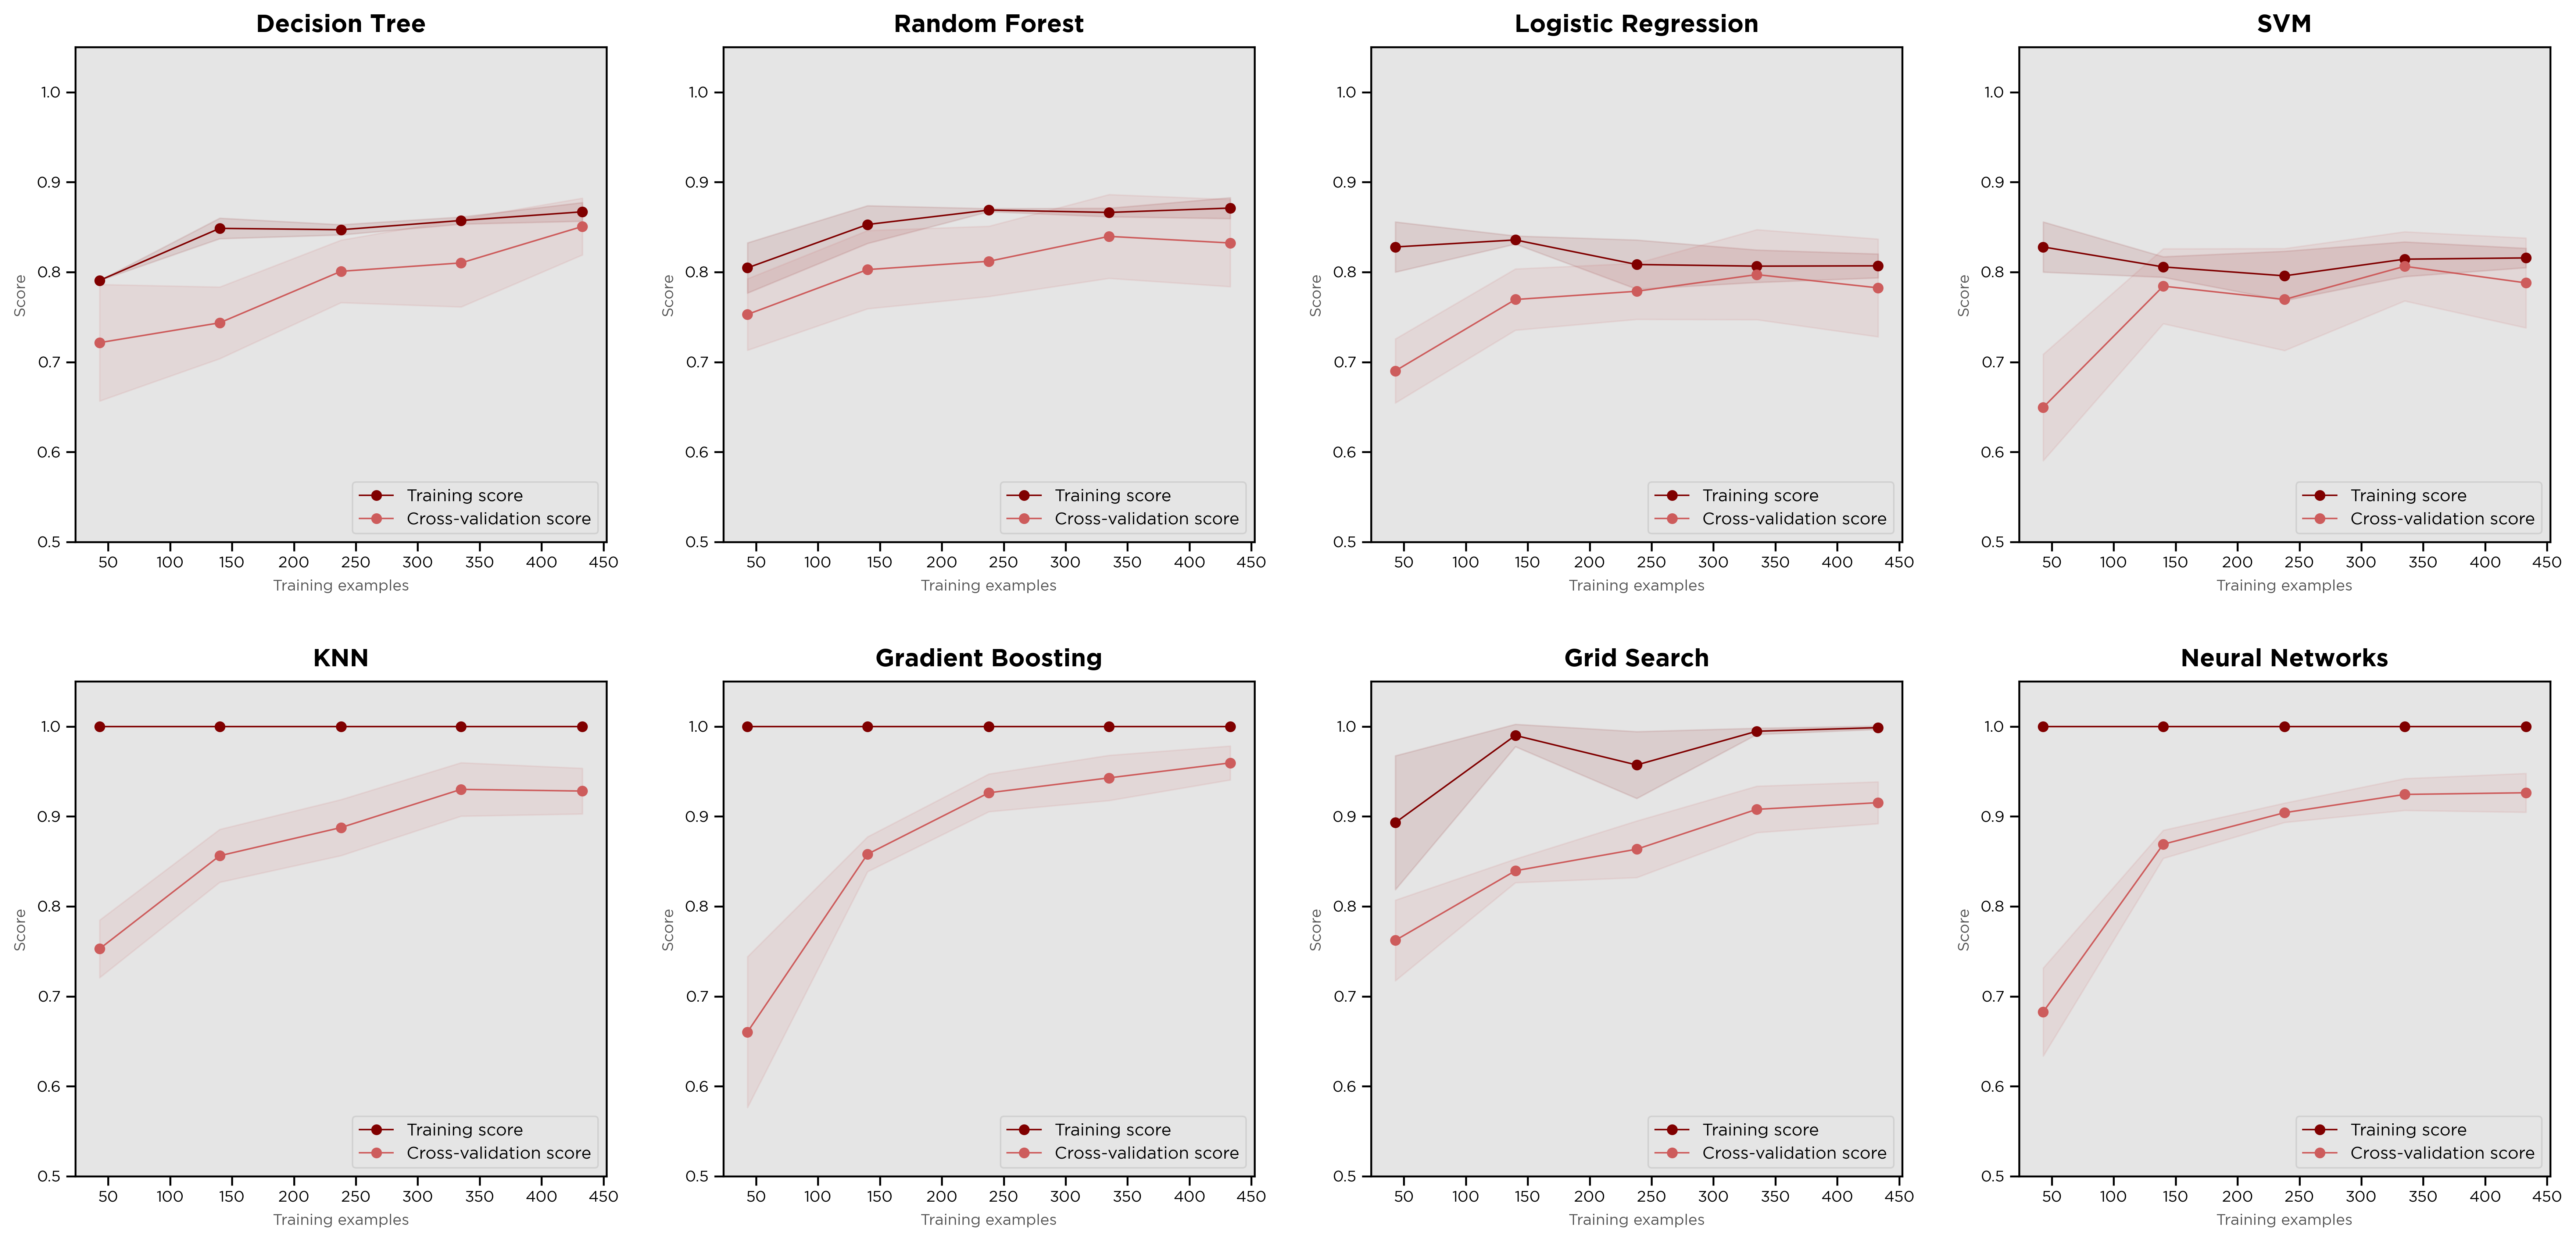

In [37]:
crossval(models, X_train_smotetom_scaled, y_train_smotetom, X_test_smotetom_scaled, y_test_smotetom, 2, 4, '11_crossval_res.png', save_path="../figures/02_train")

## Prediction Using the Chosen Model

In [38]:
save_path = "../figures/03_results"
os.makedirs(save_path, exist_ok=True)

In [39]:
others = df_predict
df_nonothers = df_train

model_gb = models['Gradient Boosting']

X_nonothers = df_nonothers.drop("Political Affiliation", axis=1)
y_nonothers = df_nonothers["Political Affiliation"]

X_others_test = others.drop("Political Affiliation", axis=1)

X_train_nonothers, y_train_nonothers = shuffle(X_nonothers, y_nonothers)

In [40]:
model_gb.fit(X_train_nonothers, y_train_nonothers)

y_pred_gb_res1 = model_gb.predict(X_others_test)

print('Political View Predictions for the "Others" dataset (GB):', y_pred_gb_res1.tolist())

Political View Predictions for the "Others" dataset (GB): [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]


In [41]:
df_nonothers

Sex  Age  City  Education  Economic Status  Education Reform  \
0       0    1     0          4                0                 1   
1       0    1     0          4                1                 1   
2       0    0     0          2                1                 1   
3       0    1     0          3                0                 1   
4       0    4     0          5                0                 0   
...   ...  ...   ...        ...              ...               ...   
1066    0    0     0          2                0                 1   
1067    0    0     6          2                0                 1   
1068    0    1     5          2                0                 1   
1069    0    0     0          2                0                 1   
1070    0    1     2          2                1                 1   

      Privatization  Death Penalty  Neutral Journalism  Alcohol Prohibition  \
0                 1              0                   0                    0   
1                 0              1                   0                    1   
2                 0              1                   0                    1   
3                 1              1                   0                    0   
4                 0              0                   0                    0   
...             ...            ...                 ...                  ...   
1066              1              0                   0                    0   
1067              0              0                   0                    0   
1068              0              0                   0                    0   
1069              1              0                   0                    1   
1070              0              0                   0                    0   

      Secularism  Abortion Ban  Ohal  New Party  Political Affiliation  
0              1             0     1          1                      1  
1              0             1     0          0                      1  
2              1             1     1          1                      1  
3              1             1     0          0                      1  
4              0             0     0          0                      0  
...          ...           ...   ...        ...                    ...  
1066           1             0     0          0                      0  
1067           1             0     1          1                      0  
1068           1             0     1          1                      0  
1069           1             1     1          1                      1  
1070           1             0     1          1                      0  

[1071 rows x 15 columns]

In [42]:
others_gb = others.copy()

In [43]:
others_gb["Political Affiliation"] = y_pred_gb_res1

print(others_gb["Political Affiliation"].value_counts())

1    179
0    111
Name: Political Affiliation, dtype: int64


In [44]:
# We can already concatenate the 'Others' data with the original data and visualize the political views of the participants

df_new = pd.concat([df_nonothers, others_gb], axis=0).reset_index(drop=True)
df_new.tail(10)

Sex  Age  City  Education  Economic Status  Education Reform  \
1351    0    0     4          2                0                 1   
1352    0    0     0          2                0                 1   
1353    0    1     6          4                0                 1   
1354    0    0     0          2                1                 1   
1355    0    0     2          2                0                 1   
1356    0    0     4          2                1                 1   
1357    0    4     2          5                1                 0   
1358    0    0     1          2                0                 1   
1359    0    2     0          5                0                 1   
1360    0    1     0          2                0                 1   

      Privatization  Death Penalty  Neutral Journalism  Alcohol Prohibition  \
1351              1              1                   0                    1   
1352              0              1                   0                    0   
1353              1              1                   0                    0   
1354              0              1                   0                    1   
1355              1              1                   1                    1   
1356              1              1                   0                    0   
1357              1              1                   1                    1   
1358              0              1                   0                    1   
1359              1              0                   0                    0   
1360              1              1                   0                    0   

      Secularism  Abortion Ban  Ohal  New Party  Political Affiliation  
1351           0             1     0          1                      1  
1352           1             0     1          1                      1  
1353           1             0     1          1                      0  
1354           1             1     1          1                      1  
1355           1             1     1          0                      0  
1356           1             0     1          1                      0  
1357           1             0     1          0                      1  
1358           0             1     1          1                      1  
1359           1             0     1          1                      1  
1360           1             0     1          1                      1

In [45]:
df_count_other = others_gb["Political Affiliation"].value_counts()
df_values = df_new["Political Affiliation"].value_counts()
df_orig = df_train["Political Affiliation"].value_counts()

print(df_count_other)
print(df_values)
print(df_orig)

1    179
0    111
Name: Political Affiliation, dtype: int64
1    850
0    511
Name: Political Affiliation, dtype: int64
1    671
0    400
Name: Political Affiliation, dtype: int64


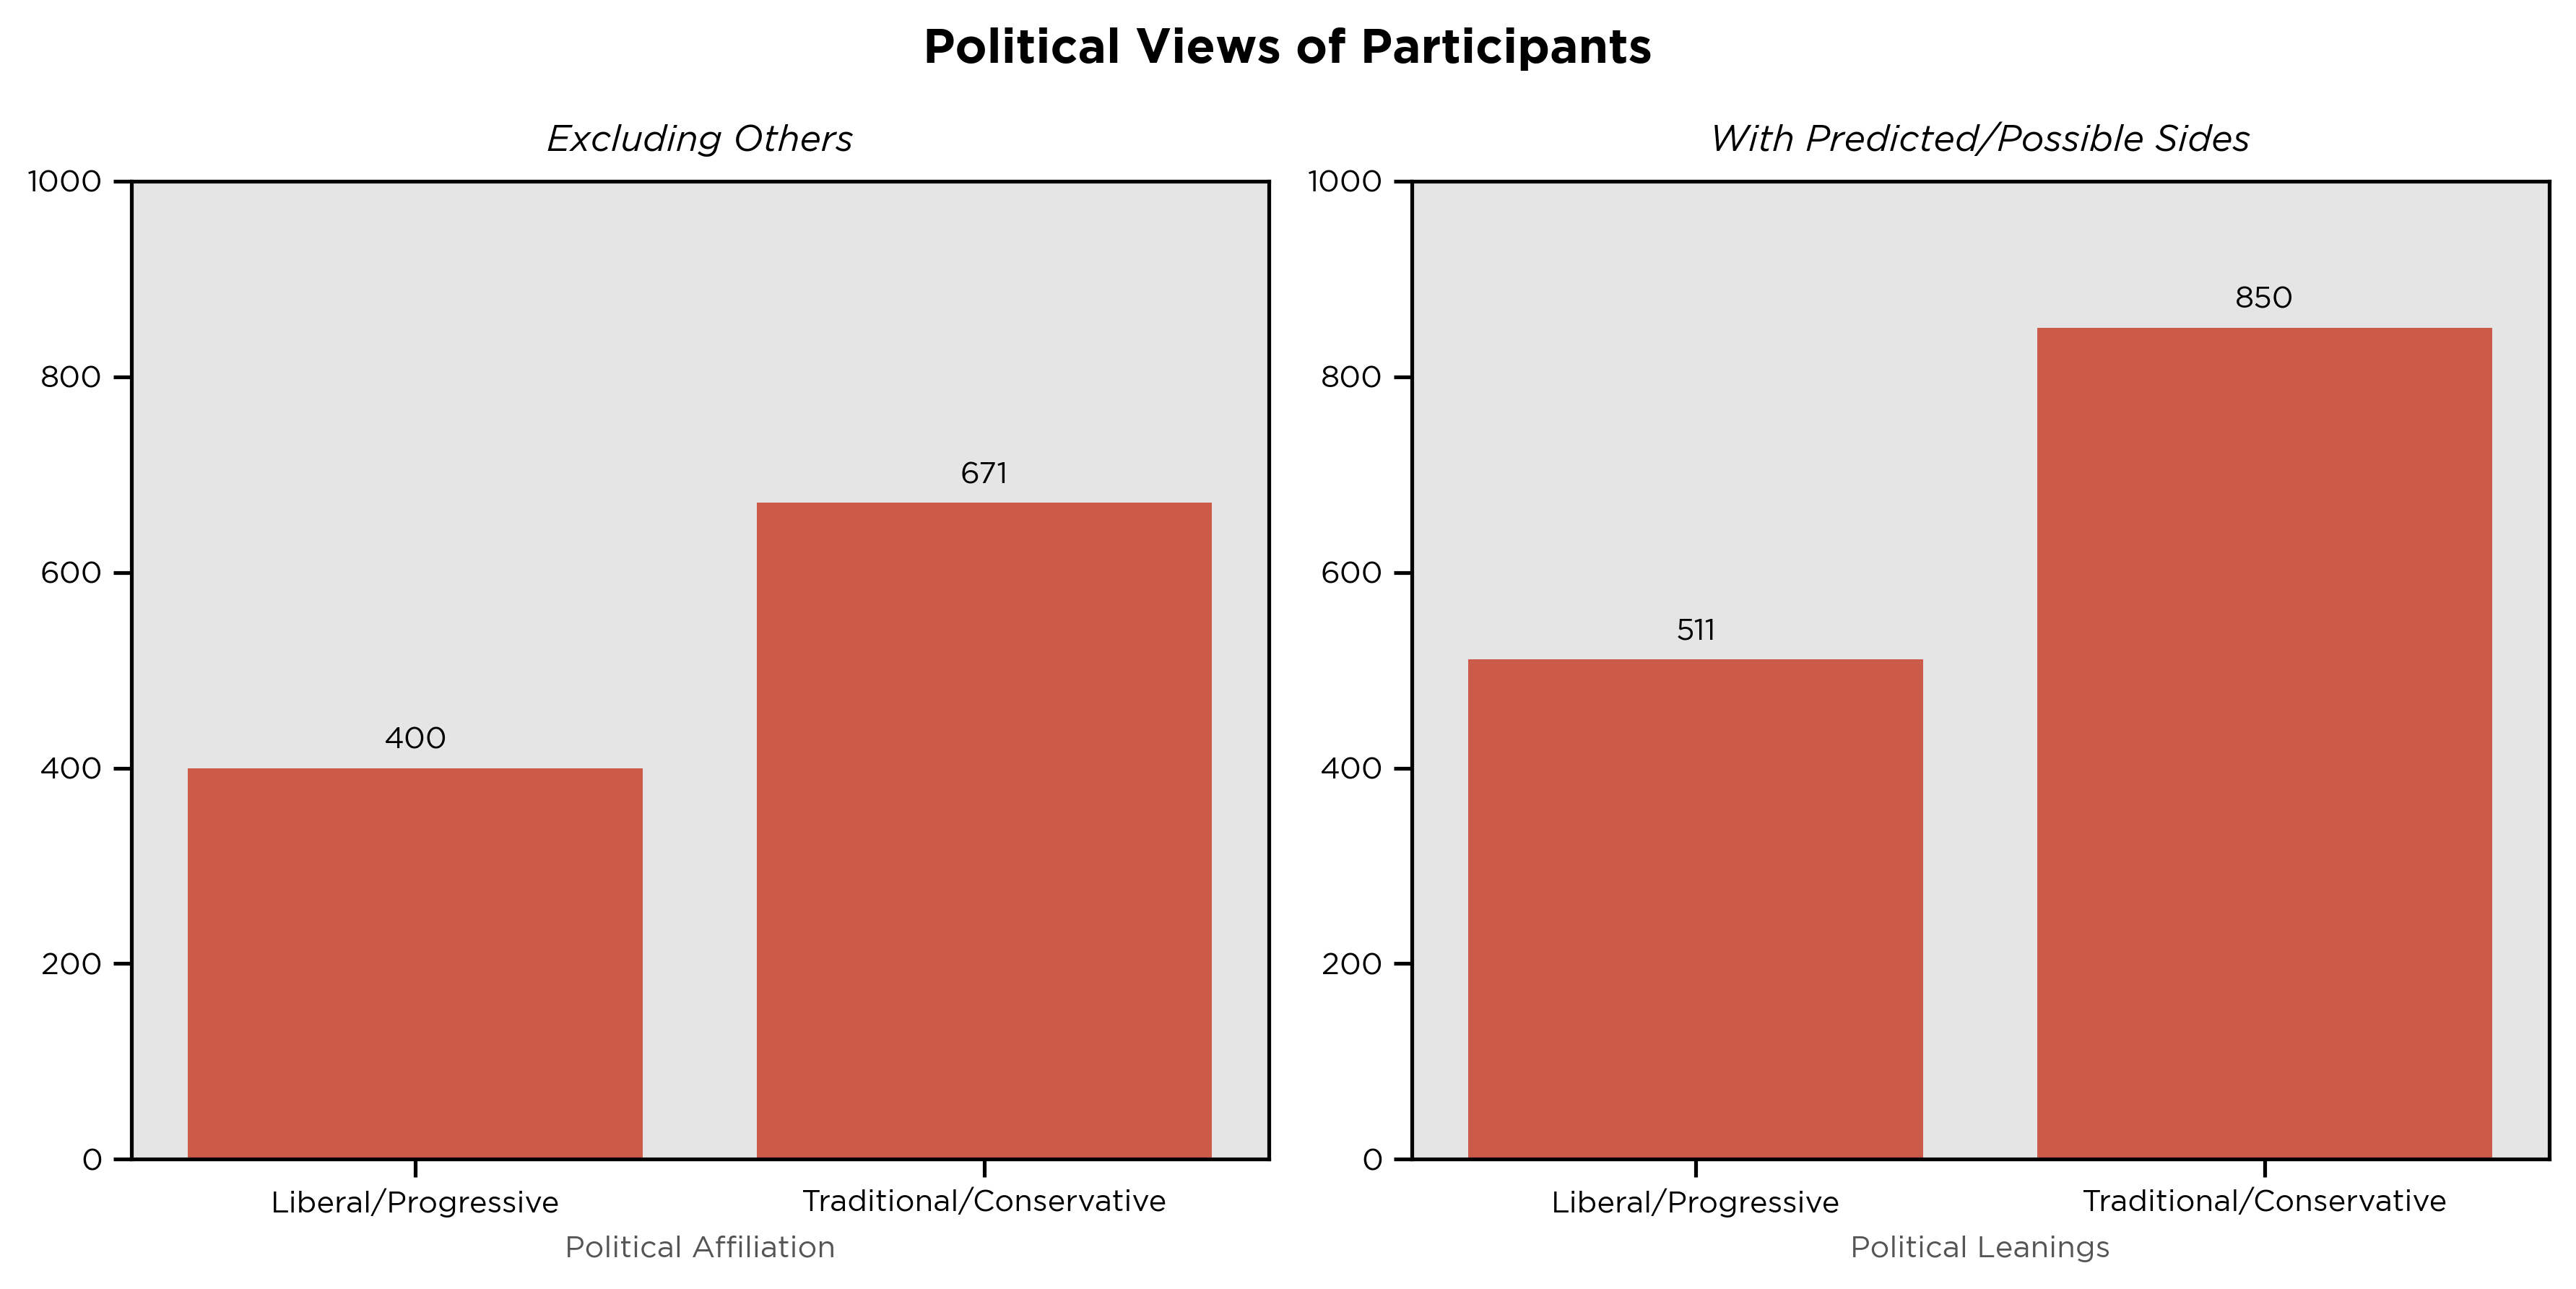

In [46]:
# Count the number of participants in each political view by means of sex

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=df_orig.index, y=df_orig.values, ax=ax[0])
ax[0].set_title("Excluding Others", fontstyle="italic", fontsize=12, pad=10)

ax[0].set_xticklabels(["Liberal/Progressive", "Traditional/Conservative"])
ax[0].set_ylim(0, 1000)
ax[0].set_xlabel("Political Affiliation")

sns.barplot(x=df_values.index, y=df_values.values, ax=ax[1])
ax[1].set_title("With Predicted/Possible Sides", fontstyle="italic", fontsize=12, pad=10)

ax[1].set_ylim(0, 1000)
ax[1].set_xticklabels(["Liberal/Progressive", "Traditional/Conservative"])
ax[1].set_xlabel("Political Leanings")

# Annotations for the first bar plot
for i in range(2):  # Loop over both subplots
    for bar in ax[i].patches:  # Iterate through the bars (patches)
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()

        # Check if the bar has a height greater than 0 before annotating
        if height > 0:
            # Convert numerical values to locale-aware formatted strings
            # If you don't want the locale formatting, simply use height instead of formatted_height
            formatted_height = locale.format_string("%.0f", height, grouping=True)
            ax[i].text(
                x + width / 2,
                height + 15,
                formatted_height,
                color="black",
                ha="center",
                va="bottom",
                fontsize=10,
            )

plt.suptitle("Political Views of Participants", fontweight="bold", fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join(save_path, "01_views_overall.png"), dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

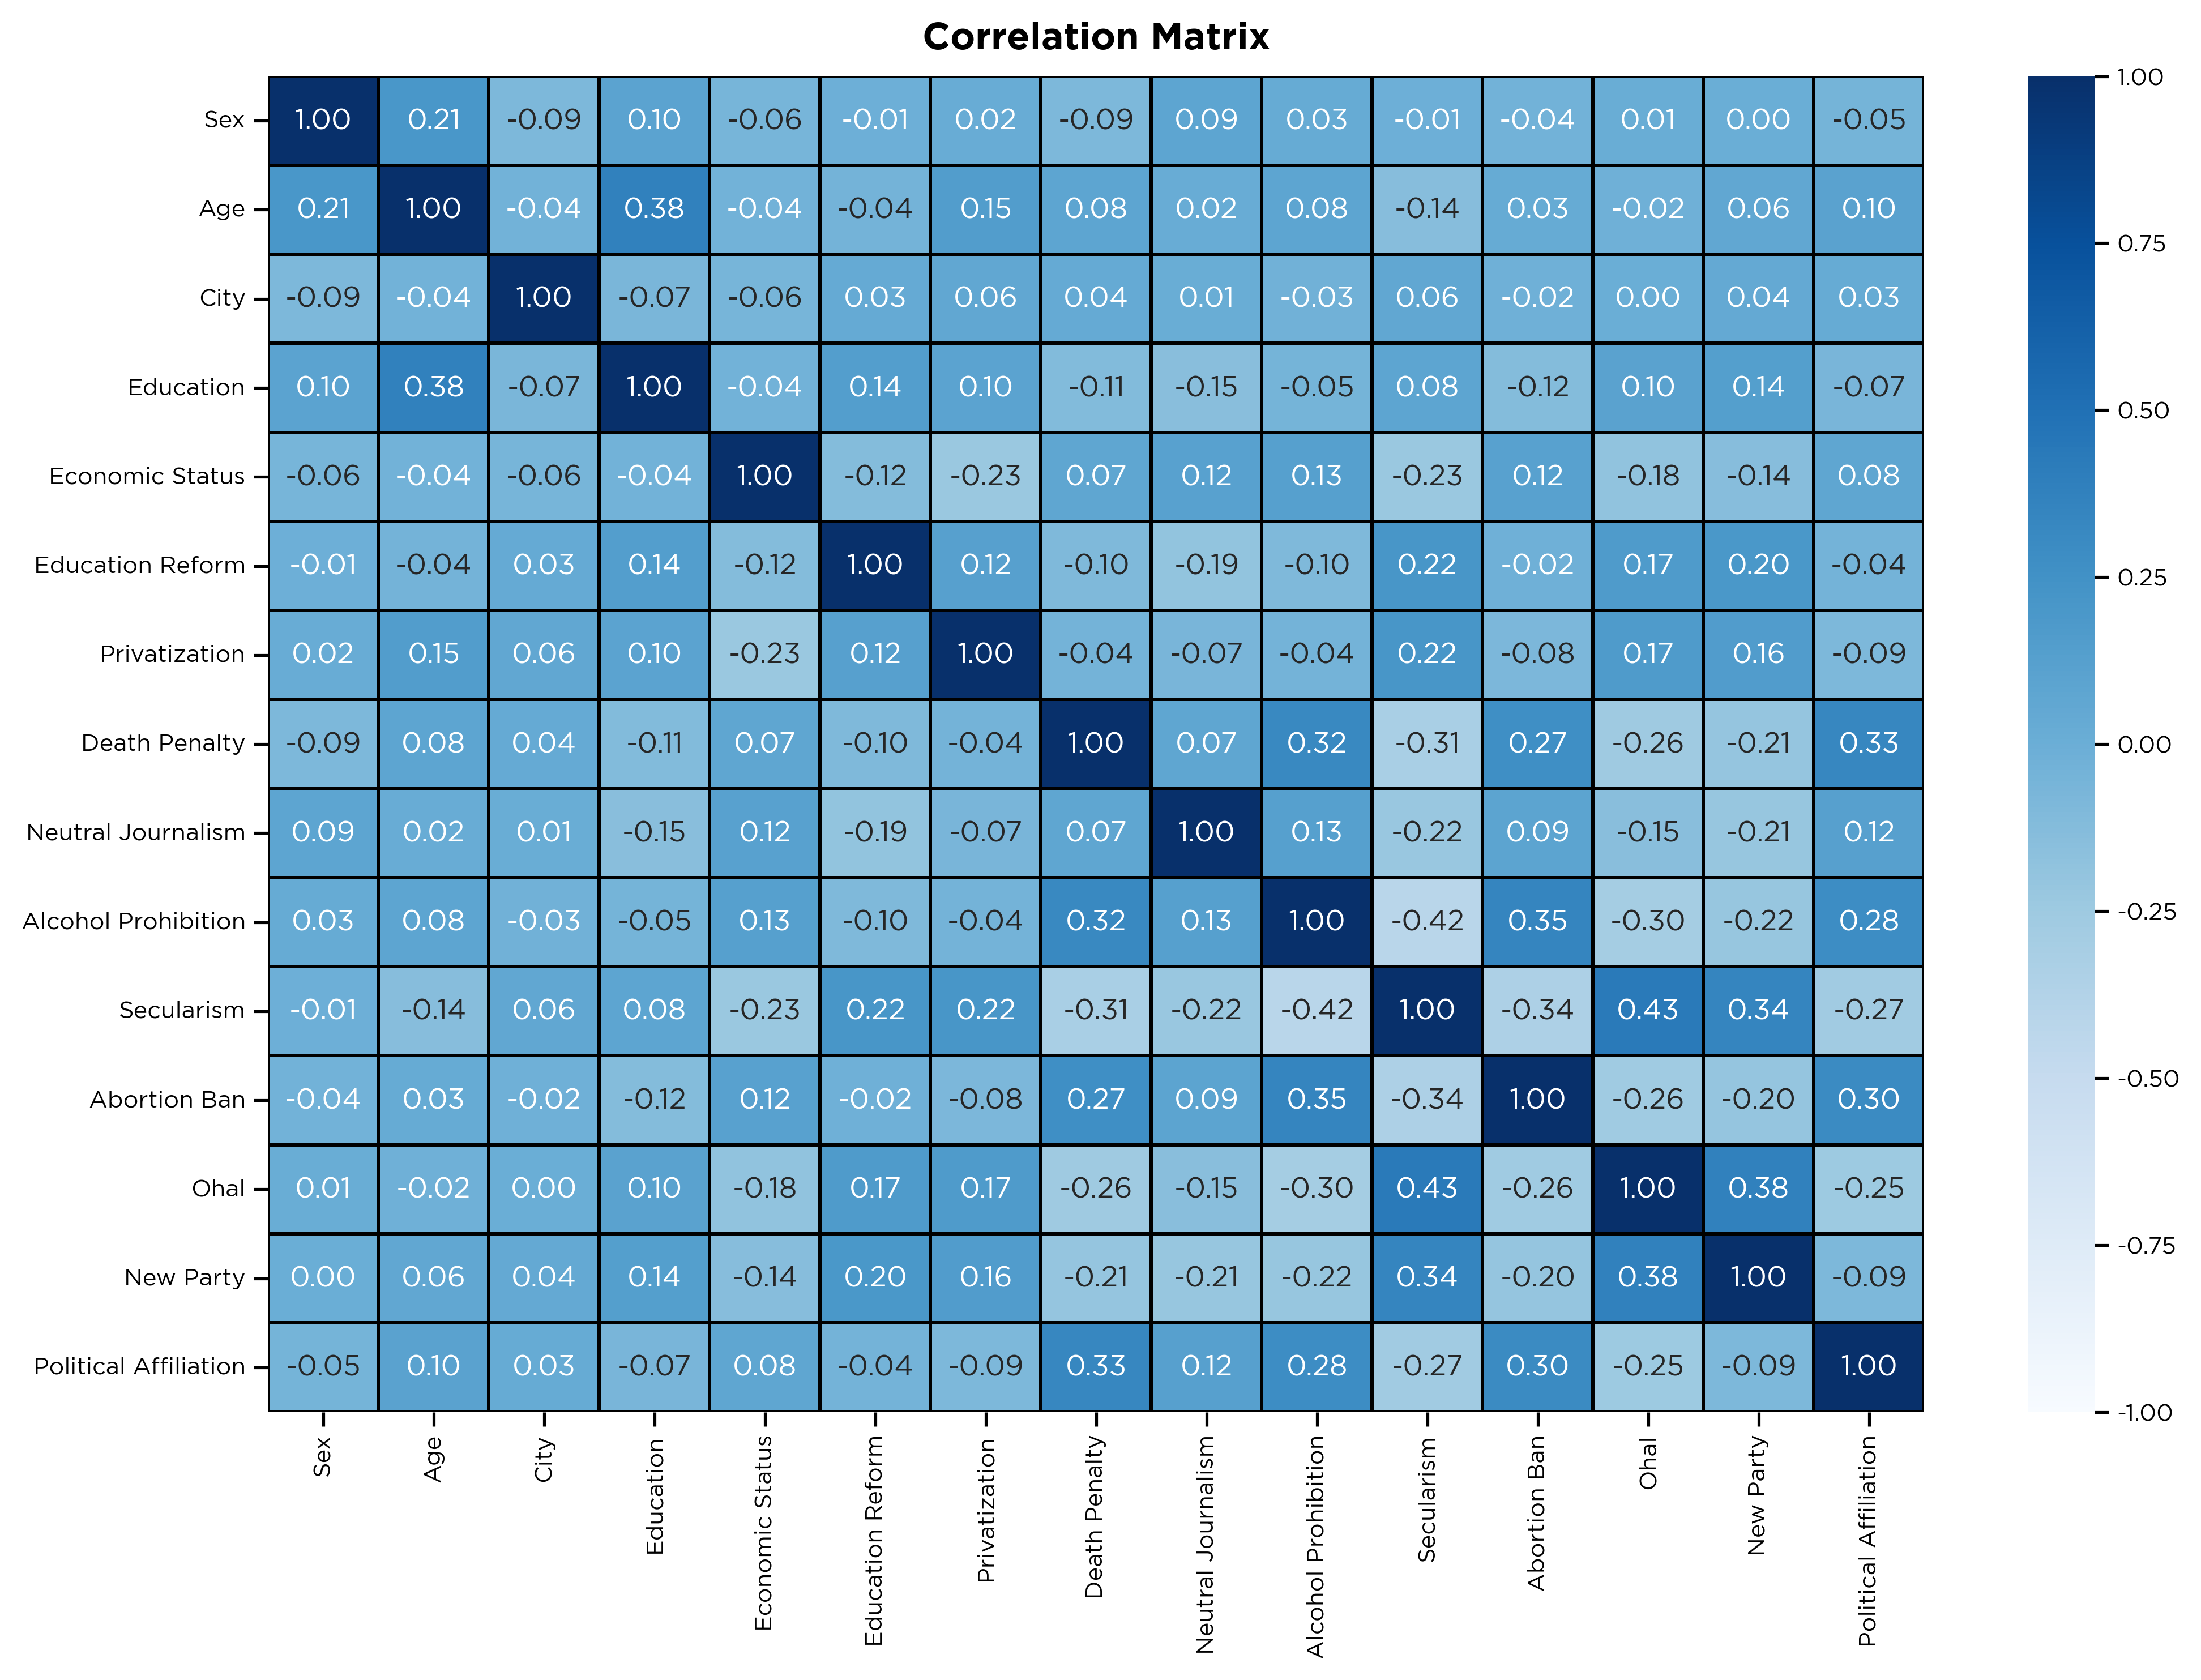

In [47]:
df_new_correlation_matrix = df_new.corr(method="spearman")

plt.figure(figsize=(14, 10))
sns.heatmap(
    df_new_correlation_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    linewidths=1,
    linecolor="black",
)
plt.title("Correlation Matrix", fontweight="bold", fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

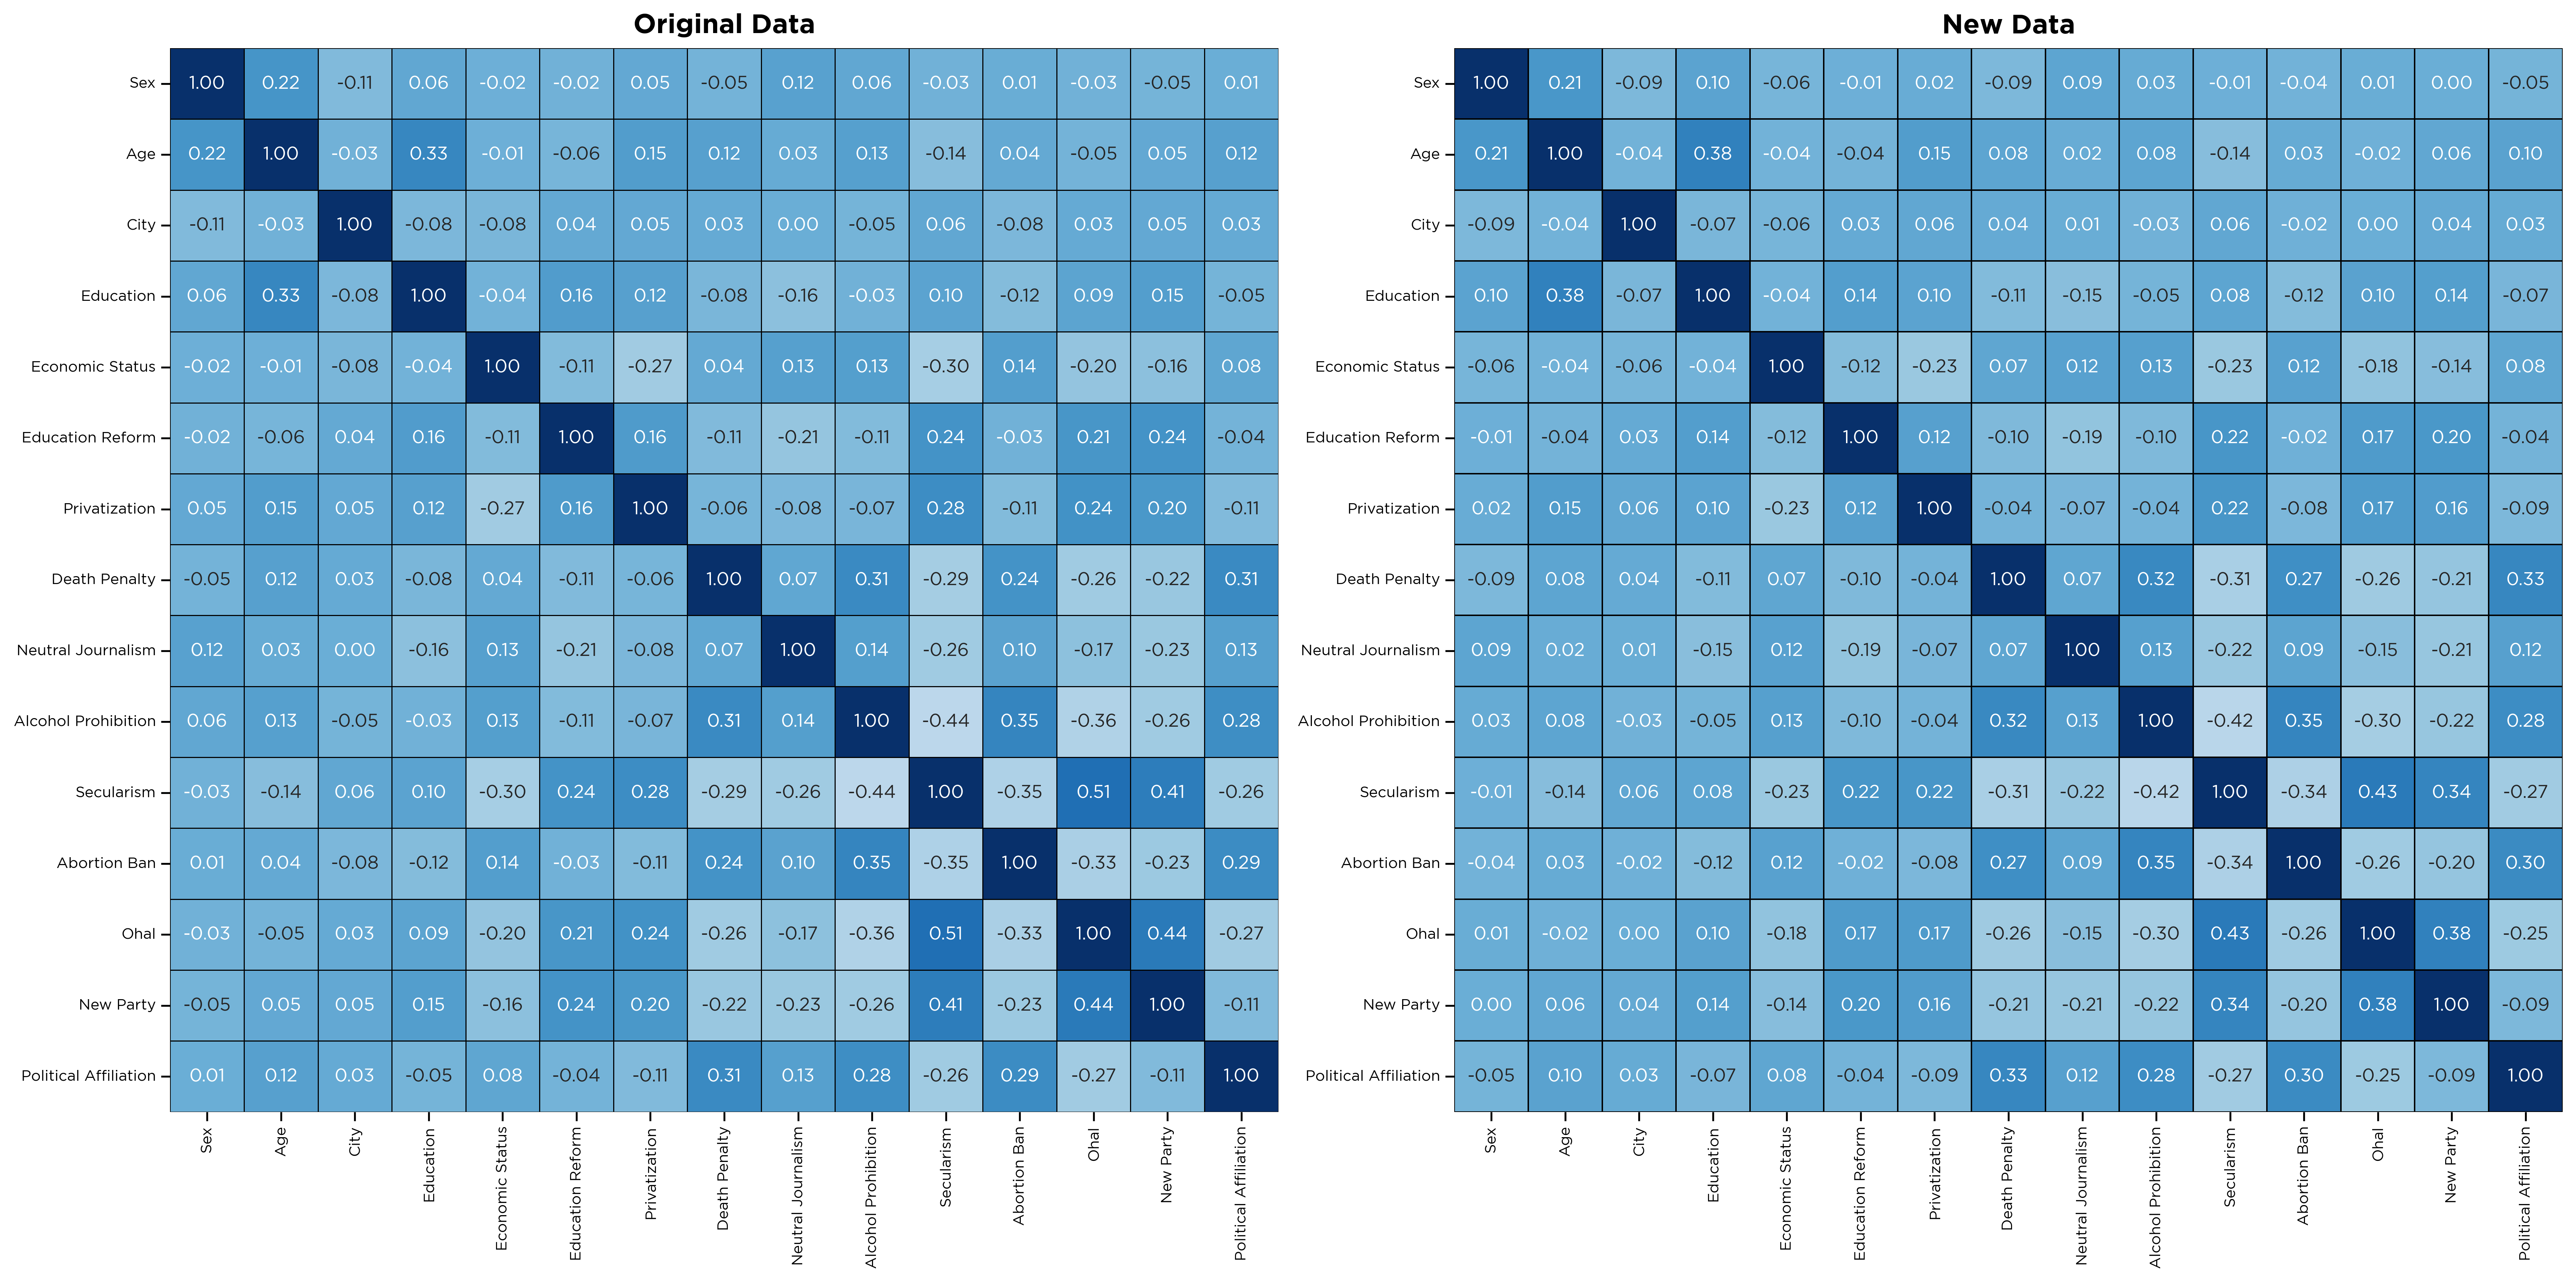

In [48]:
# Compare the correlation matrix of the original data and the new data (with the 'Others' data classified)

fig, ax = plt.subplots(1, 2, figsize=(24, 12))

# Do correlation analysis
correlation_matrix = df_train.corr(method="spearman")

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    ax=ax[0],
    vmin=-1,
    vmax=1,
    linewidths=0.25,
    linecolor="black",
    cbar=False,
)
ax[0].set_title("Original Data", fontweight="bold", fontsize=18, pad=10)

sns.heatmap(
    df_new_correlation_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    ax=ax[1],
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor="black",
    cbar=False,
)
ax[1].set_title("New Data", fontweight="bold", fontsize=18, pad=10)

plt.tight_layout()
plt.savefig(os.path.join(save_path, "02_correlation_matrix.png"), dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [49]:
end_time = time.time()

time_spent = end_time - start_time

# Convert time_spent to minutes and seconds
minutes = int(time_spent // 60)
seconds = int(time_spent % 60)

print(f'Runtime: {minutes} minutes and {seconds} seconds')

Runtime: 4 minutes and 7 seconds


In [50]:
import watermark

%load_ext watermark

%watermark -v -iv -p scikit-learn

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.15.0

scikit-learn: 1.5.1

matplotlib: 3.7.5
watermark : 2.4.3
sys       : 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
pandas    : 1.5.3
numpy     : 1.26.4
seaborn   : 0.13.2

